<a href="https://colab.research.google.com/github/xavierbrt/telecom-fil-rouge/blob/master/Regression_model_exploration_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
!pip install ppscore

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [ ]:
import math
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

from pycaret.regression import *

from sklearn.model_selection import StratifiedShuffleSplit

import ppscore as pps

import glob

# **Chargement des subsets, création du dataframe**

In [ ]:
path = r'/content/drive/My Drive/Dataset 2/' # use your path

all_files = glob.glob(path + "*.csv")
print(all_files)

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_concat = pd.concat(li, axis=0, ignore_index=True)

['/content/drive/My Drive/Dataset 2/2019_2_Stork.csv', '/content/drive/My Drive/Dataset 2/2016_2_Stork.csv', '/content/drive/My Drive/Dataset 2/2019_1_Stork.csv', '/content/drive/My Drive/Dataset 2/2017_1_Stork.csv', '/content/drive/My Drive/Dataset 2/2018_2_Stork.csv', '/content/drive/My Drive/Dataset 2/2018_1_Stork.csv', '/content/drive/My Drive/Dataset 2/2017_2_Stork.csv']


In [ ]:
df_concat.shape

(780473, 146)

In [ ]:
print(df_concat.isnull().sum().to_string())

Unnamed: 0                                0
VMOY                                      1
VMOY_latitude                             1
VMOY_longitude                            1
angle_oiseau                              0
day                                       0
distance                                  0
distance_inst                             0
distance_latitude                         0
distance_latitude_inst                    0
distance_longitude                        0
distance_longitude_inst                   0
duree                                     0
duree_cumulee (h)                         0
duree_h                                   0
event-id                                  0
ground-speed                              0
ground-speed-kmh                          0
heading                                   0
heading_m1h                               0
height-above-ellipsoid                    0
height-above-ellipsoid_1                  0
height-above-ellipsoid_2        

In [ ]:
cols_to_keep = ['VMOY','VMOY_latitude','VMOY_longitude',
                'distance','distance_inst','distance_latitude',
                'distance_latitude_inst','distance_longitude','distance_longitude_inst',
                'duree','duree_cumulee (h)','duree_h','event-id','ground-speed',
                'ground-speed-kmh','heading','heading_m1h','height-above-ellipsoid',
                'height-above-ellipsoid_m1h','location-lat','location-long','month',
                'tag-local-identifier','timestamp','year','TMP_surface',
                'TMP_2maboveground','TMP_1000mb','TMP_950mb','TMP_850mb','TMP_700mb',
                'UGRD_10maboveground','VGRD_10maboveground','UGRD_1000mb','VGRD_1000mb',
                'UGRD_950mb','VGRD_950mb','UGRD_850mb','VGRD_850mb','UGRD_700mb',
                'VGRD_700mb','PRES_surface','PRMSL_meansealevel','APCP_surface',
                'PRATE_surface','RH_2maboveground','RH_1000mb','RH_950mb','RH_850mb',
                'RH_700mb','Sun','day','Norme_Vent_10maboveground','Norme_Vent_1000mb',
                'Norme_Vent_950mb','Norme_Vent_850mb','Norme_Vent_700mb','Angle_Vent_10maboveground', 
                'Angle_Vent_1000mb','Angle_Vent_950mb','Angle_Vent_850mb','Angle_Vent_700mb',    
                'angle_oiseau'] # , 'timestamp_1', 'timestamp_2'

df_concat = pd.DataFrame(df_concat[cols_to_keep])

In [ ]:
df_concat.shape

(780473, 63)

In [ ]:
print(df_concat.dtypes.to_string())

VMOY                          float64
VMOY_latitude                 float64
VMOY_longitude                float64
distance                      float64
distance_inst                 float64
distance_latitude             float64
distance_latitude_inst        float64
distance_longitude            float64
distance_longitude_inst       float64
duree                         float64
duree_cumulee (h)             float64
duree_h                       float64
event-id                        int64
ground-speed                  float64
ground-speed-kmh              float64
heading                       float64
heading_m1h                   float64
height-above-ellipsoid        float64
height-above-ellipsoid_m1h    float64
location-lat                  float64
location-long                 float64
month                           int64
tag-local-identifier            int64
timestamp                      object
year                            int64
TMP_surface                   float64
TMP_2maboveg

In [ ]:
df_concat.shape

(780473, 63)

In [ ]:
print(df_concat.isnull().sum().to_string())

VMOY                            1
VMOY_latitude                   1
VMOY_longitude                  1
distance                        0
distance_inst                   0
distance_latitude               0
distance_latitude_inst          0
distance_longitude              0
distance_longitude_inst         0
duree                           0
duree_cumulee (h)               0
duree_h                         0
event-id                        0
ground-speed                    0
ground-speed-kmh                0
heading                         0
heading_m1h                     0
height-above-ellipsoid          0
height-above-ellipsoid_m1h      0
location-lat                    0
location-long                   0
month                           0
tag-local-identifier            0
timestamp                       0
year                            0
TMP_surface                   346
TMP_2maboveground             346
TMP_1000mb                    346
TMP_950mb                     346
TMP_850mb     

In [ ]:
cols_to_drop = ['event-id','height-above-ellipsoid',
                'height-above-ellipsoid_m1h', 'heading', 'heading_m1h',
                'ground-speed', 'ground-speed-kmh', 
                'duree_cumulee (h)', 'duree', 'distance', 'distance_inst',
                'distance_latitude', 'distance_latitude_inst', 'distance_longitude',
                'distance_longitude_inst', 'VMOY_latitude', 'VMOY_longitude',
                'TMP_2maboveground', 'TMP_1000mb', 'TMP_950mb', 'TMP_850mb',
                'UGRD_1000mb', 'VGRD_1000mb', 'UGRD_950mb', 'VGRD_950mb',
                'UGRD_850mb', 'VGRD_850mb', 'APCP_surface', 'RH_1000mb', 'RH_950mb',
                'RH_850mb', 'RH_700mb',
                'Norme_Vent_1000mb','Norme_Vent_950mb',
                'Norme_Vent_850mb','Angle_Vent_1000mb','Angle_Vent_950mb','Angle_Vent_850mb']
                # 'location-lat', 'location-long', 'tag-local-identifier', 'timestamp', 'year',
                #  'duree_h', 'timestamp_1', 'timestamp_2'


df_concat = df_concat.drop(cols_to_drop, axis=1)

print(df_concat.isnull().sum().to_string())

VMOY                           1
duree_h                        0
location-lat                   0
location-long                  0
month                          0
tag-local-identifier           0
timestamp                      0
year                           0
TMP_surface                  346
TMP_700mb                    346
UGRD_10maboveground          346
VGRD_10maboveground          346
UGRD_700mb                   346
VGRD_700mb                   346
PRES_surface                 346
PRMSL_meansealevel           346
PRATE_surface                365
RH_2maboveground             346
Sun                            0
day                            0
Norme_Vent_10maboveground    346
Norme_Vent_700mb             346
Angle_Vent_10maboveground      0
Angle_Vent_700mb               0
angle_oiseau                   0


In [ ]:
df_concat = df_concat.dropna().reset_index(drop=True)
df_concat.shape

(779783, 25)

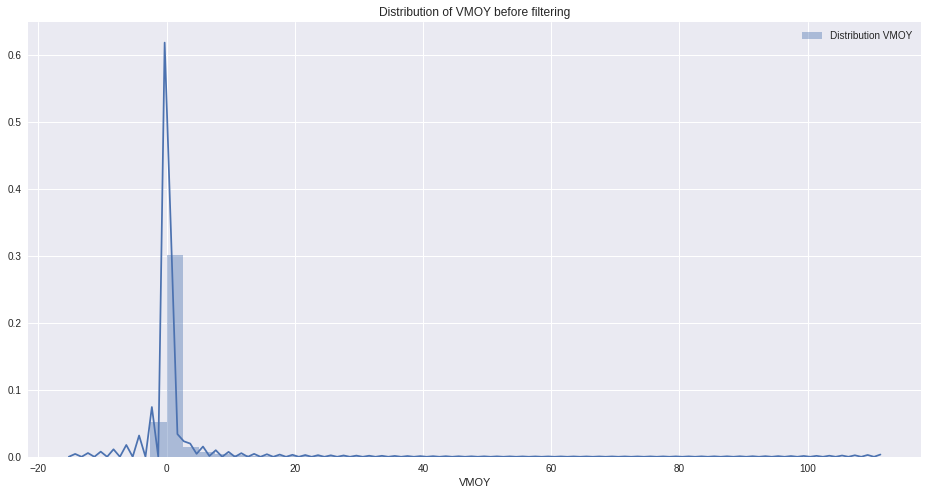

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(df_concat['VMOY'], norm_hist=True, label='Distribution VMOY')
plt.title("Distribution of VMOY before filtering")
plt.legend()
plt.show()

In [ ]:
### SPEED FILTERING
df_concat = df_concat[df_concat['VMOY'] >= 0] # On garde les VMOY >=0
df_concat = df_concat[df_concat['VMOY'] < 80] # On garde les VMOY < 80km/h

In [ ]:
df_concat.describe()

VMOY        duree_h  ...  Angle_Vent_700mb   angle_oiseau
count  7.796330e+05  779633.000000  ...     779633.000000  779633.000000
mean   1.488195e+00       2.952371  ...         76.299505     182.686548
std    5.144770e+00      36.913121  ...        112.162120     103.548684
min    8.233106e-07       0.000556  ...       -179.293721       0.000000
25%    7.495684e-03       0.999444  ...        -12.939355      95.830239
50%    6.029896e-02       1.000000  ...         76.805024     181.899883
75%    5.087053e-01       1.001111  ...        166.014612     273.230509
max    7.987902e+01    4127.004167  ...        358.970436     359.999057

[8 rows x 24 columns]

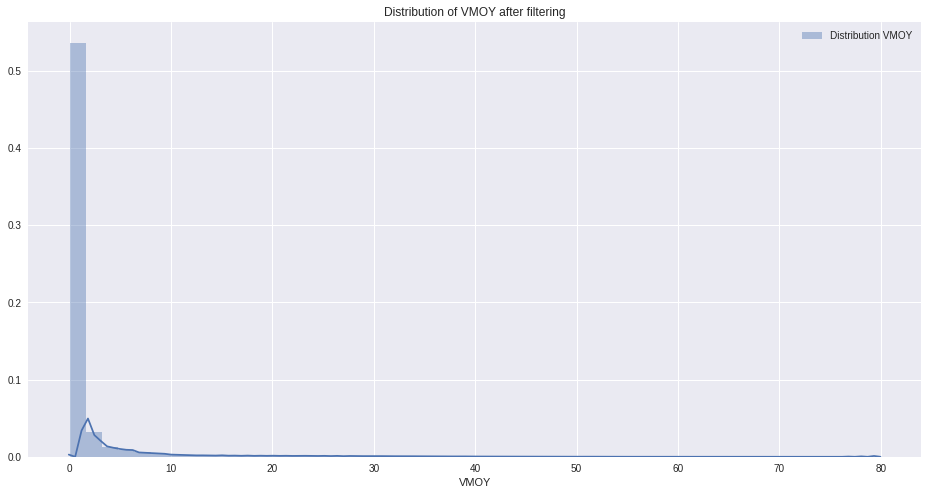

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(df_concat['VMOY'], norm_hist=True, label='Distribution VMOY')
plt.title("Distribution of VMOY after filtering")
plt.legend()
plt.show()

In [ ]:
df_concat[['duree_h']].describe()

duree_h
count  779633.000000
mean        2.952371
std        36.913121
min         0.000556
25%         0.999444
50%         1.000000
75%         1.001111
max      4127.004167

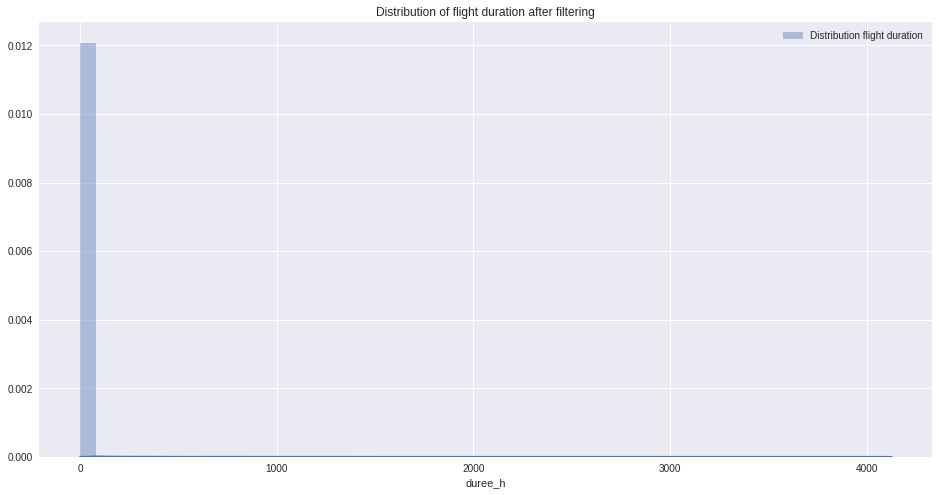

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(df_concat['duree_h'], norm_hist=True, label='Distribution flight duration')
plt.title("Distribution of flight duration after filtering")
plt.legend()
plt.show()

In [ ]:
## FILTERING duree_h (flight duration) < 48 h
df_concat = df_concat[df_concat['duree_h'] <= 24]

In [ ]:
df_concat[['duree_h']].describe()

duree_h
count  776066.000000
mean        1.412930
std         1.787881
min         0.000556
25%         0.999444
50%         1.000000
75%         1.000834
max        24.000000

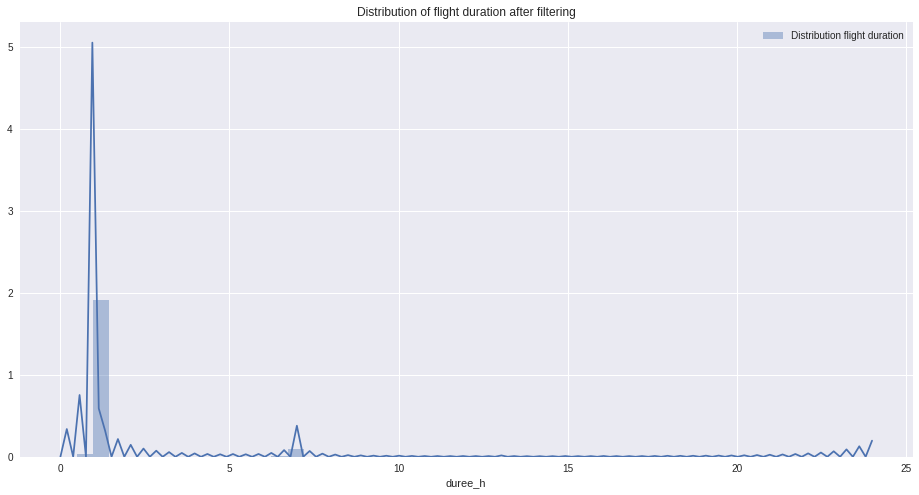

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(df_concat['duree_h'], norm_hist=True, label='Distribution flight duration')
plt.title("Distribution of flight duration after filtering")
plt.legend()
plt.show()

In [ ]:
df_concat['Sun'] = df_concat['Sun'].astype(int)
df_concat['day'] = df_concat['day'].astype(int)

In [ ]:
df_concat.dtypes

VMOY                         float64
duree_h                      float64
location-lat                 float64
location-long                float64
month                          int64
tag-local-identifier           int64
timestamp                     object
year                           int64
TMP_surface                  float64
TMP_700mb                    float64
UGRD_10maboveground          float64
VGRD_10maboveground          float64
UGRD_700mb                   float64
VGRD_700mb                   float64
PRES_surface                 float64
PRMSL_meansealevel           float64
PRATE_surface                float64
RH_2maboveground             float64
Sun                            int64
day                            int64
Norme_Vent_10maboveground    float64
Norme_Vent_700mb             float64
Angle_Vent_10maboveground    float64
Angle_Vent_700mb             float64
angle_oiseau                 float64
dtype: object

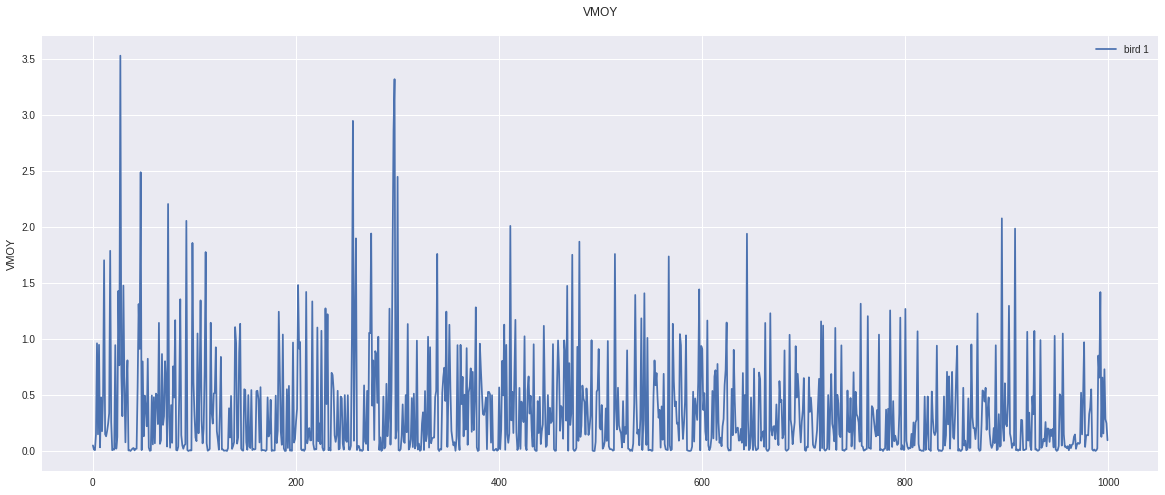

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(1000), df_concat['VMOY'].iloc[:1000], label='bird 1') 
# sns.lineplot(range(315), df_bird_2['VMOY'], label='bird 2') 
# sns.lineplot(range(315), df_bird_3['VMOY'], label='bird 3') 
plt.title("VMOY\n")
plt.show()

In [ ]:
### COMPUTE HOUR OF DAY ###

# for index, row in df_concat.iterrows():
#   df_concat.at[index, 'hours_of_day'] = df_concat['timestamp'].iloc[index][11:13]
#   if index%50000 == 0:
#     print(index)

# df_concat['hours_of_day'] = pd.to_numeric(df_concat['hours_of_day'])

In [ ]:
df_concat.groupby(['tag-local-identifier', 'year', 'month', 'day'], as_index=False)['location-lat'].last()

tag-local-identifier  year  month  day  location-lat
0                      2541  2016      7    1     47.751195
1                      2541  2016      7    2     47.751040
2                      2541  2016      7    3     47.751235
3                      2541  2016      7    4     47.751165
4                      2541  2016      7    5     47.751217
...                     ...   ...    ...  ...           ...
42021                  7207  2019     12    4     14.455539
42022                  7207  2019     12    5     14.438528
42023                  7207  2019     12    6     14.605796
42024                  7207  2019     12    7     14.512346
42025                  7207  2019     12    8     14.511800

[42026 rows x 5 columns]

In [ ]:
### COMPUTING FEATURES BY BIRD FOR EACH DAY

loc_lat_start = df_concat.groupby(['tag-local-identifier', 'year', 'month', 'day'], as_index=False)['location-lat'].first()[['location-lat']]
loc_long_start = df_concat.groupby(['tag-local-identifier', 'year', 'month', 'day'], as_index=False)['location-long'].first()[['location-long']]

loc_lat_end = df_concat.groupby(['tag-local-identifier', 'year', 'month', 'day'], as_index=False)['location-lat'].last()[['location-lat']]
loc_long_end = df_concat.groupby(['tag-local-identifier', 'year', 'month', 'day'], as_index=False)['location-long'].last()[['location-long']]


cols_to_aggregate = {"VMOY": "mean", 
                     "TMP_surface": "mean",
                     "TMP_700mb": "mean",
                     "UGRD_10maboveground": "mean",
                     "VGRD_10maboveground": "mean", 
                     "UGRD_700mb": "mean",
                     "VGRD_700mb": "mean",
                     "PRES_surface": "mean",
                     "PRMSL_meansealevel": "mean",
                     "PRATE_surface": "sum",
                     "RH_2maboveground": "mean", 
                     "Norme_Vent_10maboveground": "mean",
                     "Norme_Vent_700mb": "mean",
                     "Angle_Vent_10maboveground": "mean",
                     "Angle_Vent_700mb": "mean",
                     "angle_oiseau": "mean"}
                    #  "duree_h": "sum"
                    #  'TMP_2maboveground': "mean", 
                    #  'TMP_1000mb': "mean", 
                    #  'TMP_950mb': "mean", 
                    #  'TMP_850mb': "mean",
                    #  'UGRD_1000mb': "mean", 
                    #  'VGRD_1000mb': "mean", 
                    #  'UGRD_950mb': "mean", 
                    #  'VGRD_950mb': "mean",
                    #  'UGRD_850mb': "mean", 
                    #  'VGRD_850mb': "mean",
                    #  'APCP_surface': "mean",
                    #  'RH_1000mb': "mean", 
                    #  'RH_950mb': "mean",
                    #  'RH_850mb': "mean", 
                    #  'RH_700mb': "mean",
                     
df_concat = df_concat.groupby(['tag-local-identifier', 'year', 'month', 'day'], as_index=False).agg(cols_to_aggregate)

df_concat['location-lat-start'] = loc_lat_start
df_concat['location-long-start'] = loc_long_start

df_concat['location-lat-end'] = loc_lat_end
df_concat['location-long-end'] = loc_long_end

df_concat

tag-local-identifier  year  ...  location-lat-end  location-long-end
0                      2541  2016  ...         47.751195           8.933138
1                      2541  2016  ...         47.751040           8.933179
2                      2541  2016  ...         47.751235           8.933044
3                      2541  2016  ...         47.751165           8.933266
4                      2541  2016  ...         47.751217           8.933149
...                     ...   ...  ...               ...                ...
42021                  7207  2019  ...         14.455539         -15.642014
42022                  7207  2019  ...         14.438528         -15.595257
42023                  7207  2019  ...         14.605796         -15.533051
42024                  7207  2019  ...         14.512346         -15.480321
42025                  7207  2019  ...         14.511800         -15.460564

[42026 rows x 24 columns]

In [ ]:
df_concat['tag-local-identifier'].nunique()

105

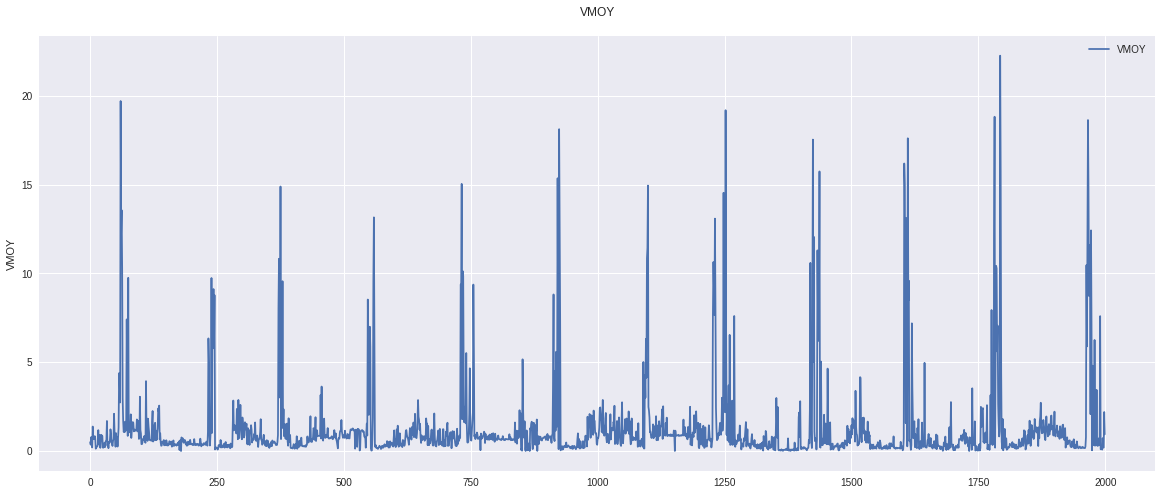

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(2000), df_concat['VMOY'].iloc[:2000], label='VMOY') 
# sns.lineplot(range(315), df_bird_2['VMOY'], label='bird 2') 
# sns.lineplot(range(315), df_bird_3['VMOY'], label='bird 3') 
plt.title("VMOY\n")
plt.show()

In [ ]:
# ## RECOMPUTING REAL SPEED ON 24H
# df_concat['VMOY_24h'] = df_concat['VMOY']*df_concat['duree_h']/24

# df_concat

In [ ]:
### KEEPING 1 BIRDS IN 2019 MIGRATIONS
df_concat[df_concat['year']==2019]['tag-local-identifier'].unique()

array([2541, 2543, 2561, 2665, 3024, 3027, 3029, 3064, 3170, 3264, 3907,
       3921, 3941, 3963, 3984, 3992, 3994, 3996, 4001, 4004, 4347, 4354,
       4355, 4360, 4363, 4364, 4408, 5526, 5527, 5944, 5945, 6377, 6379,
       6380, 6381, 6382, 6383, 6385, 6386, 6586, 6592, 6593, 6982, 6988,
       6990, 6993, 6995, 6996, 7032, 7200, 7203, 7204, 7205, 7206, 7207])

In [ ]:
df_concat_2019 = df_concat[df_concat['year']==2019]
df_bird_1 = df_concat_2019[df_concat_2019['tag-local-identifier']==2561][:500]
df_bird_1 = df_bird_1.rename(columns={"angle_oiseau": "cap_oiseau"})
# df_bird_2 = df_concat_2019[df_concat_2019['tag-local-identifier']==4364][:500]
# df_bird_3 = df_concat_2019[df_concat_2019['tag-local-identifier']==3170][:500]
df_bird_1.shape

(315, 24)

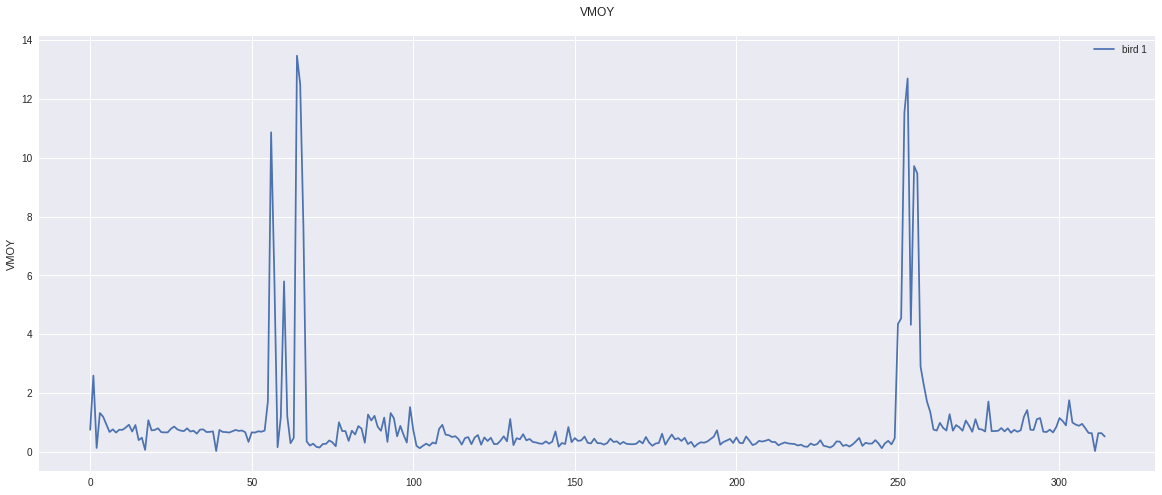

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(315), df_bird_1['VMOY'], label='bird 1') 
# sns.lineplot(range(315), df_bird_2['VMOY'], label='bird 2') 
# sns.lineplot(range(315), df_bird_3['VMOY'], label='bird 3') 
plt.title("VMOY\n")
plt.show()

In [ ]:
df_concat.shape

(42026, 24)

In [ ]:
df_concat = df_concat.drop(df_bird_1.index)
# df_concat = df_concat.drop(df_bird_2.index)
# df_concat = df_concat.drop(df_bird_3.index)
df_concat = df_concat.drop(['tag-local-identifier', 'year', 'day'], axis=1)
df_concat = df_concat.rename(columns={"angle_oiseau": "cap_oiseau"})
df_concat.shape

(41711, 21)

In [ ]:
print(df_concat.isnull().sum().to_string())

month                        0
VMOY                         0
TMP_surface                  0
TMP_700mb                    0
UGRD_10maboveground          0
VGRD_10maboveground          0
UGRD_700mb                   0
VGRD_700mb                   0
PRES_surface                 0
PRMSL_meansealevel           0
PRATE_surface                0
RH_2maboveground             0
Norme_Vent_10maboveground    0
Norme_Vent_700mb             0
Angle_Vent_10maboveground    0
Angle_Vent_700mb             0
cap_oiseau                   0
location-lat-start           0
location-long-start          0
location-lat-end             0
location-long-end            0


In [ ]:
df_concat.dtypes

month                          int64
VMOY                         float64
TMP_surface                  float64
TMP_700mb                    float64
UGRD_10maboveground          float64
VGRD_10maboveground          float64
UGRD_700mb                   float64
VGRD_700mb                   float64
PRES_surface                 float64
PRMSL_meansealevel           float64
PRATE_surface                float64
RH_2maboveground             float64
Norme_Vent_10maboveground    float64
Norme_Vent_700mb             float64
Angle_Vent_10maboveground    float64
Angle_Vent_700mb             float64
cap_oiseau                   float64
location-lat-start           float64
location-long-start          float64
location-lat-end             float64
location-long-end            float64
dtype: object

In [ ]:
# cols_to_drop = ['Norme_Vent_700mb','Angle_Vent_700mb', 'Angle_Vent_10maboveground', 'Norme_Vent_10maboveground']  
#                 # 'Angle_Vent_10maboveground', 'Norme_Vent_10maboveground'


# df_concat = df_concat.drop(cols_to_drop, axis=1)

In [ ]:
# cols_to_drop_2 = ['TMP_700mb', 'UGRD_700mb',	'VGRD_700mb']
#                 # 'UGRD_10maboveground', 'VGRD_10maboveground'
# df_concat = df_concat.drop(cols_to_drop_2, axis=1)

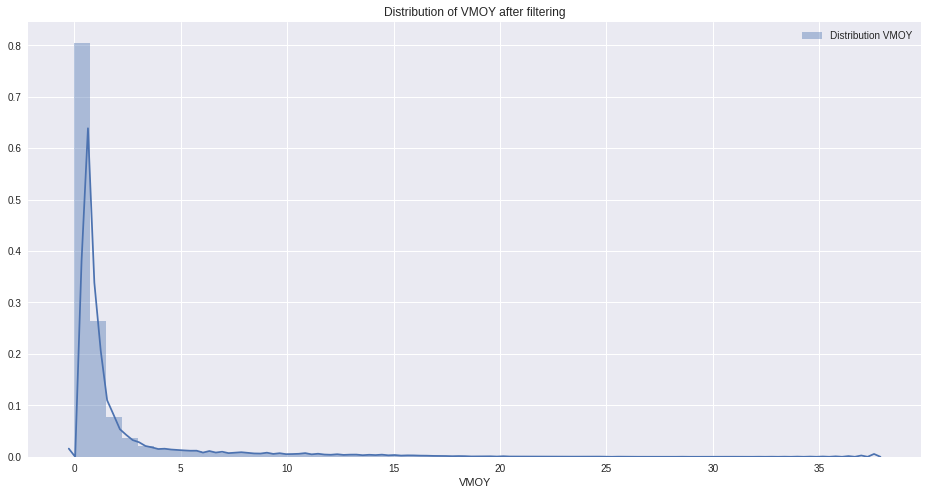

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(df_concat['VMOY'], norm_hist=True, label='Distribution VMOY')
plt.title("Distribution of VMOY after filtering")
plt.legend()
plt.show()

In [ ]:
df_concat.dtypes

month                          int64
VMOY                         float64
TMP_surface                  float64
TMP_700mb                    float64
UGRD_10maboveground          float64
VGRD_10maboveground          float64
UGRD_700mb                   float64
VGRD_700mb                   float64
PRES_surface                 float64
PRMSL_meansealevel           float64
PRATE_surface                float64
RH_2maboveground             float64
Norme_Vent_10maboveground    float64
Norme_Vent_700mb             float64
Angle_Vent_10maboveground    float64
Angle_Vent_700mb             float64
cap_oiseau                   float64
location-lat-start           float64
location-long-start          float64
location-lat-end             float64
location-long-end            float64
dtype: object

## **Predictive Power Score and Correlation Matrix** (*Ne pas relancer exécution*)

Attention, peut prendre du temps à calculer selon le nombre de colonnes supprimées plus haut.

In [ ]:
df_pps_matrix = pps.matrix(df_concat.drop(['month', 'Norme_Vent_10maboveground',	'Norme_Vent_700mb',	'Angle_Vent_10maboveground', 'Angle_Vent_700mb'], axis=1))

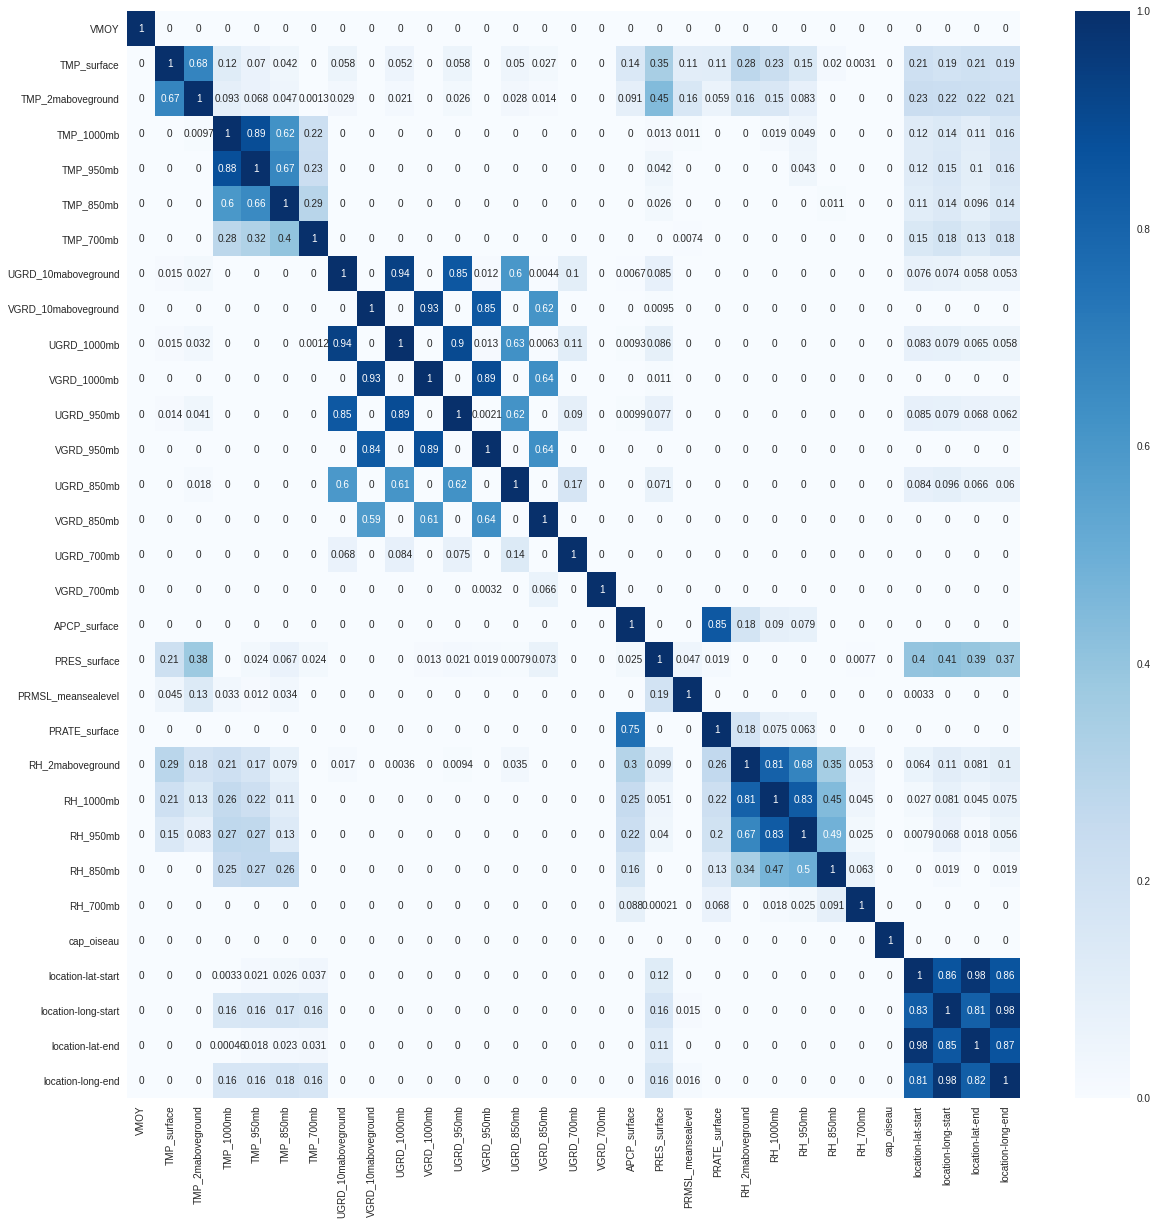

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df_pps_matrix, vmin=0, vmax=1, cmap="Blues", annot=True)

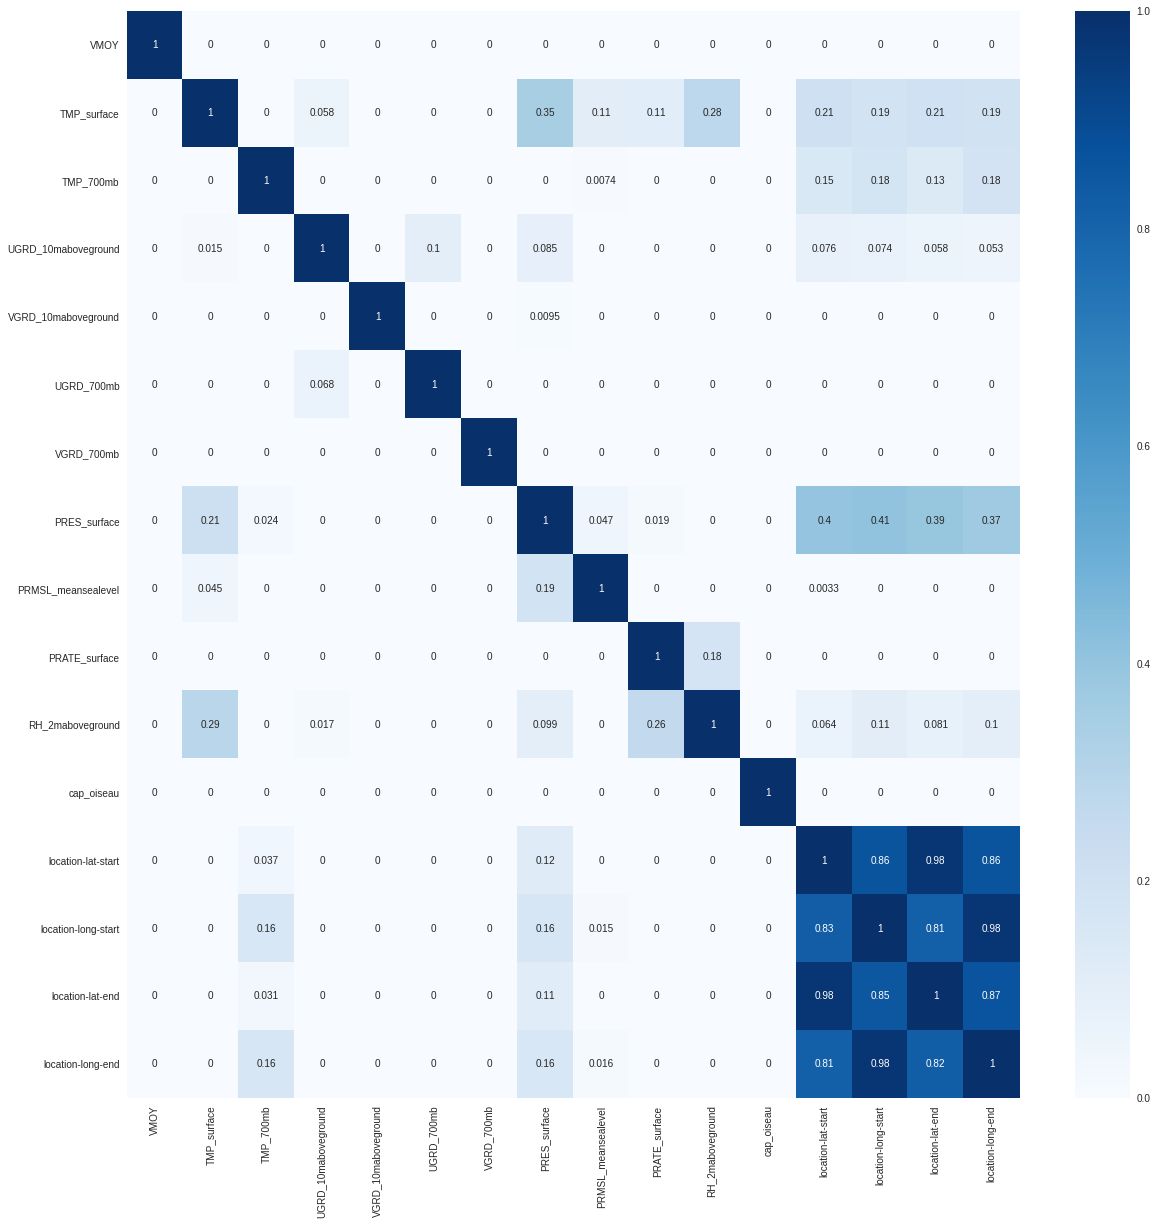

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df_pps_matrix, vmin=0, vmax=1, cmap="Blues", annot=True)

In [ ]:
# Compute the correlation matrix
corr = df_concat.drop(['month', 'Norme_Vent_10maboveground',	'Norme_Vent_700mb',	'Angle_Vent_10maboveground', 'Angle_Vent_700mb'], axis=1).corr()

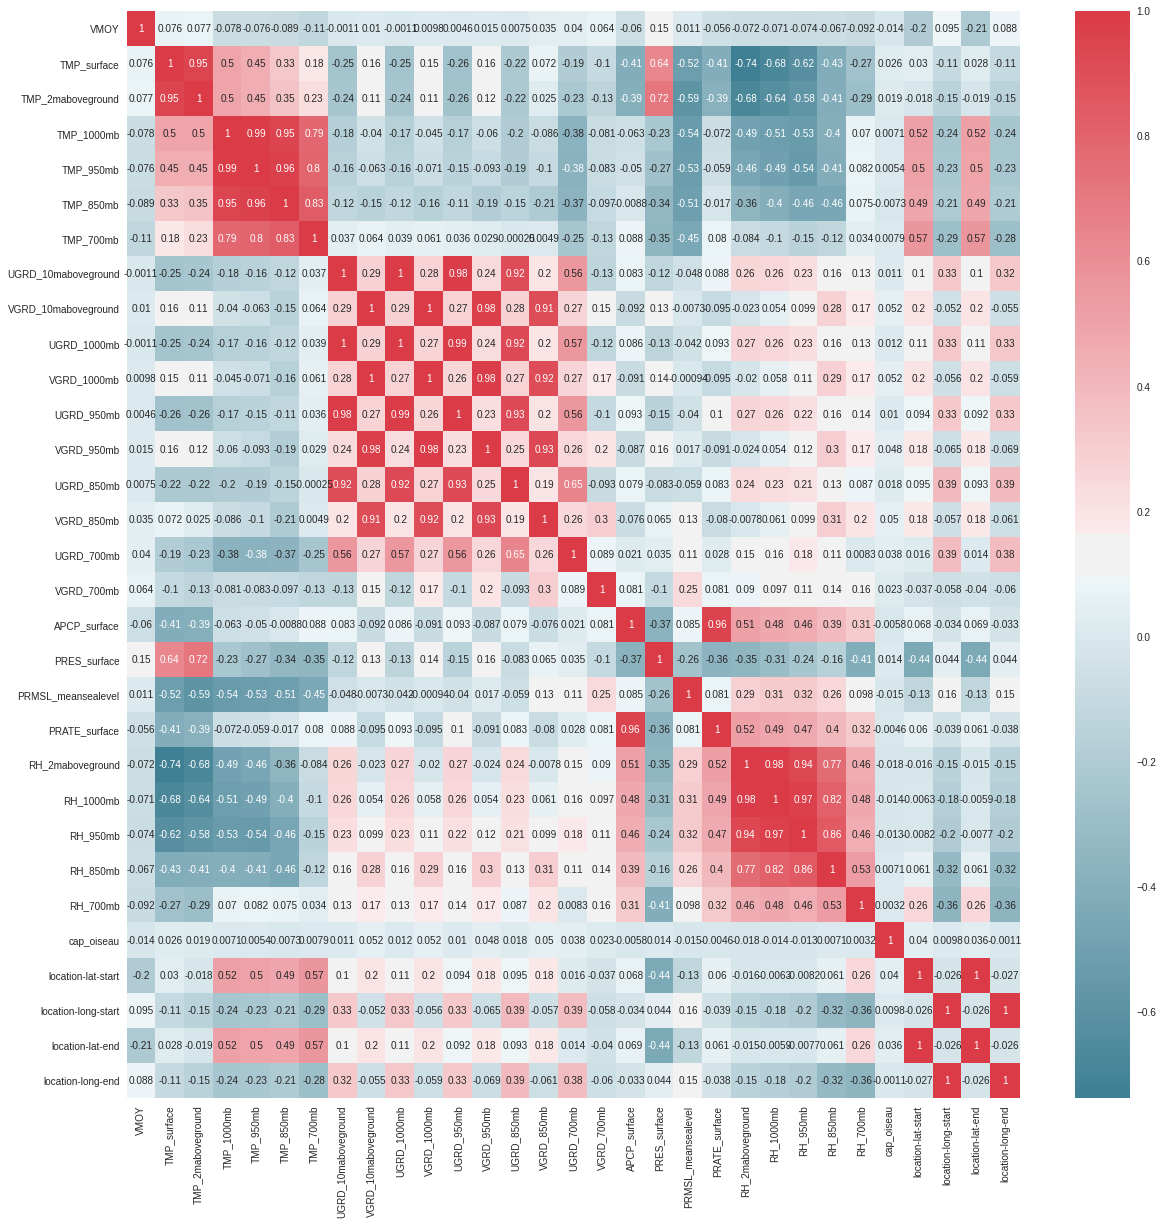

In [ ]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr, cmap=cmap, annot=True)

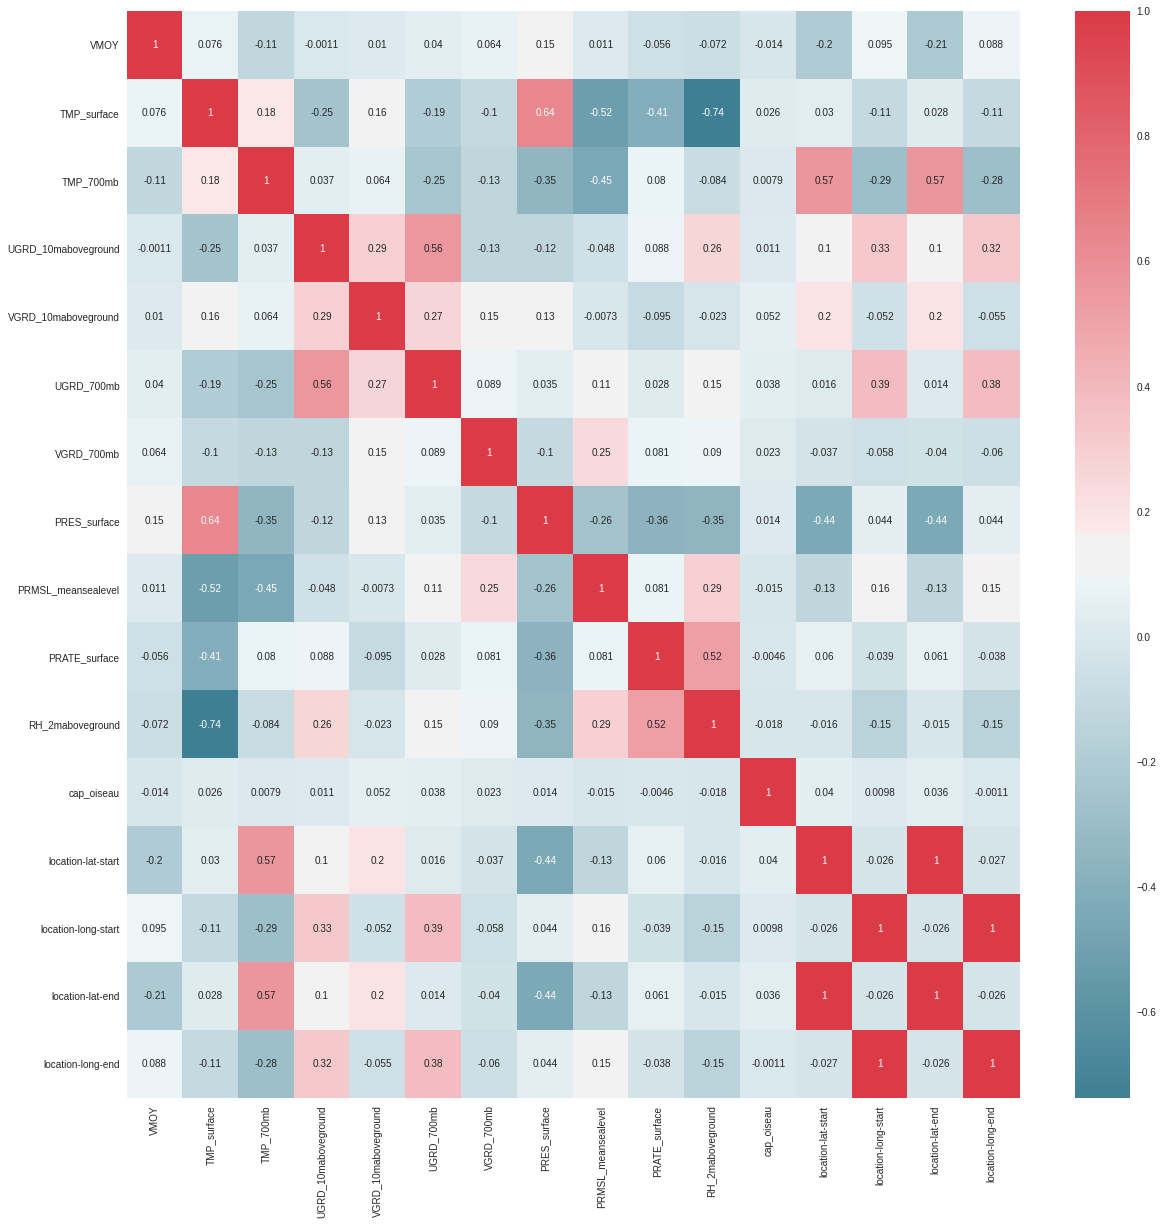

In [ ]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr, cmap=cmap, annot=True)

# **Régression brute avec toutes les données**

https://pycaret.org/

https://pycaret.org/regression/

https://github.com/pycaret/pycaret/blob/master/Tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb


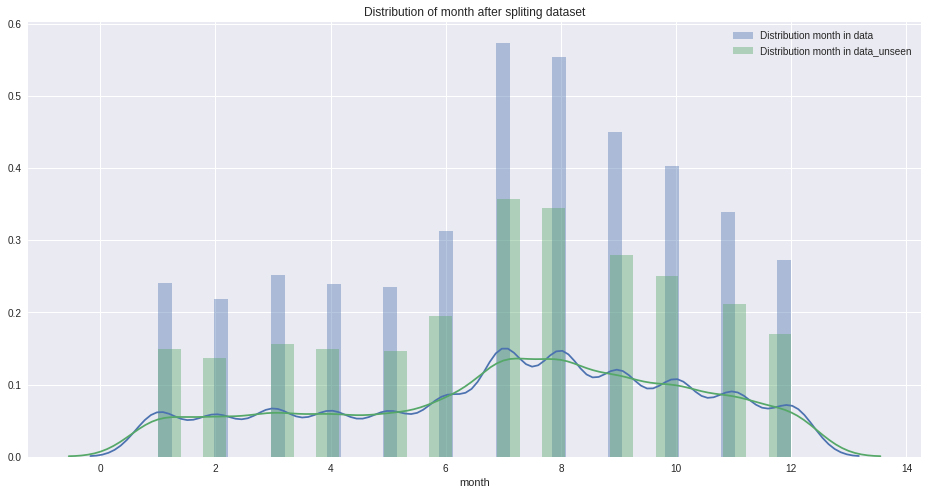


Data for Modeling: (33368, 16)
Unseen Data For Predictions (8343, 16)


In [ ]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=786)

for train_index, test_index in stratified_split.split(df_concat, df_concat['month']):
    data = df_concat.iloc[train_index].reset_index(drop=True)
    data_unseen = df_concat.iloc[test_index].reset_index(drop=True)

plt.figure(figsize=(16,8))
sns.distplot(data['month'], norm_hist=True, label='Distribution month in data')
sns.distplot(data_unseen['month'], norm_hist=True, label='Distribution month in data_unseen')
plt.title("Distribution of month after spliting dataset")
plt.legend()
plt.show()

data = data.drop(['month', 'Norme_Vent_10maboveground',	'Norme_Vent_700mb',	
                  'Angle_Vent_10maboveground', 'Angle_Vent_700mb'], axis=1)
data_unseen = data_unseen.drop(['month', 'Norme_Vent_10maboveground',	'Norme_Vent_700mb',	
                                'Angle_Vent_10maboveground', 'Angle_Vent_700mb'], axis=1)

print()
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

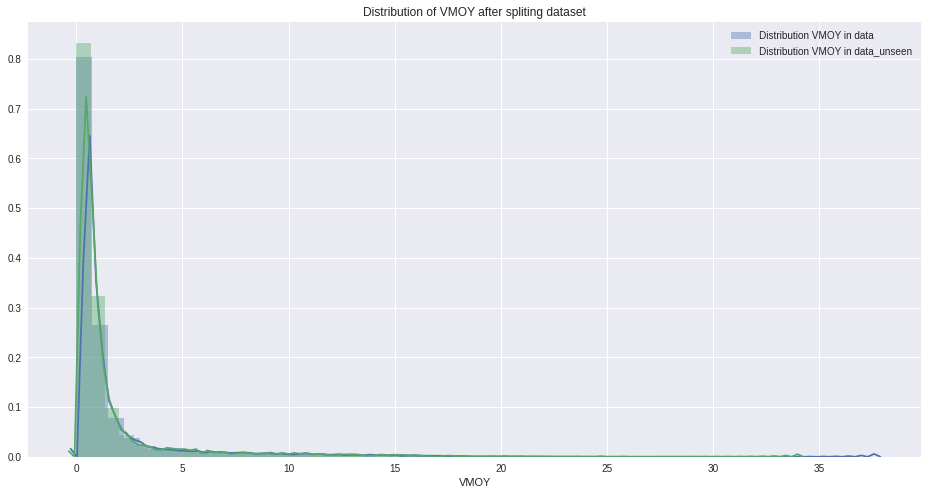

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(data['VMOY'], norm_hist=True, label='Distribution VMOY in data')
sns.distplot(data_unseen['VMOY'], norm_hist=True, label='Distribution VMOY in data_unseen')
plt.title("Distribution of VMOY after spliting dataset")
plt.legend()
plt.show()

In [ ]:
data = df_concat.sample(frac=0.7, random_state=786).reset_index(drop=True)
data_unseen = df_concat.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (627526, 17)
Unseen Data For Predictions (156882, 17)


## **Configuration de l'environnement avec PyCaret**

In [ ]:
from pycaret.regression import *

In [ ]:
exp_reg101 = setup(data = data, target = 'VMOY', session_id=123,
                   normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.90)

 
Setup Succesfully Completed!


In [ ]:
exp_reg102 = setup(data = data, target = 'VMOY', session_id=124)

 
Setup Succesfully Completed!


In [ ]:
exp_reg103 = setup(data = data, target = 'VMOY', session_id=125, train_size=0.7)

 
Setup Succesfully Completed!


In [ ]:
exp_reg104 = setup(data = data, target = 'VMOY', session_id=126, train_size=0.7,
                   feature_selection = True, feature_selection_threshold = 0.62)

 
Setup Succesfully Completed!


## **Comparaison entre modèles**

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using k-fold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) of all the available models in the model library.


| Estimator	| Abbreviated String |
|---|---|
| Linear Regression |	‘lr’ |
| Lasso Regression |	‘lasso’ |
| Ridge Regression |	‘ridge’ |
| Elastic Net |	‘en’ |
| Least Angle Regression |	‘lar’ |
| Lasso Least Angle Regression |	‘llar’ |
| Orthogonal Matching Pursuit	| ‘omp’ |
| Bayesian Ridge |	‘br’ |
| Automatic Relevance Determination |	‘ard’ |
| Passive Aggressive Regressor |	‘par’ |
| Random Sample Consensus |	‘ransac’ |
| TheilSen Regressor |	‘tr’ |
| Huber Regressor |	‘huber’ |
| Kernel Ridge |	‘kr’ |
| Support Vector Machine |	‘svm’ |
| K Neighbors Regressor |	‘knn’ |
| Decision Tree |	‘dt’ |
| Random Forest |	‘rf’ |
| Extra Trees Regressor |	‘et’ |
| AdaBoost Regressor |	‘ada’ |
| Gradient Boosting Regressor | ‘gbr’ |
| Multi Level Perceptron |	‘mlp’ |
| Extreme Gradient Boosting	| ‘xgboost’ |
| Light Gradient Boosting |	‘lightgbm’ |
| CatBoost Regressor |	‘catboost’ |



Test du 14/06 avec sélection de variables et petite transformation.

In [ ]:
not_to_test = ['huber', 'tr', 'svm', 'rf'] # 

compare_models(sort = 'MAE', blacklist = not_to_test, fold = 5)

In [ ]:
df_concat.head(0)

Empty DataFrame
Columns: [VMOY, location-lat, location-long, month, TMP_surface, UGRD_10maboveground, VGRD_10maboveground, PRES_surface, PRMSL_meansealevel, PRATE_surface, RH_2maboveground, Sun, day, angle_oiseau, hours_of_day]
Index: []

In [ ]:
not_to_test = ['huber', 'tr', 'svm'] # 

compare_models(sort = 'MAE', blacklist = not_to_test, fold = 5)

Essai avec PCA 10 composantes

In [ ]:
not_to_test = ['huber', 'tr', 'svm'] # 

compare_models(sort = 'MAE', blacklist = not_to_test, fold = 5)

Essai avec feature selection avec seuil à 0.2

In [ ]:
not_to_test = ['huber', 'tr', 'svm'] # 

compare_models(sort = 'MAE', blacklist = not_to_test, fold = 5)

Essai du 18/06 sur vitesses moyennes calculées par jours, données brutes

In [ ]:
not_to_test = ['huber', 'tr', 'svm'] # 

compare_models(sort = 'MAE', blacklist = not_to_test, fold = 5)

Essai du 18/06 sur vitesses moyennes calculées par jours avec feature selection


In [ ]:
not_to_test = ['huber', 'tr', 'svm'] # 

compare_models(sort = 'MAE', blacklist = not_to_test, fold = 5)

Essai du 19/06 sur vitesses moyennes calculées par trajets journaliers sans feature selection

In [ ]:
not_to_test = ['huber', 'tr', 'svm'] # 

compare_models(sort = 'MAE', blacklist = not_to_test, fold = 5)

In [ ]:
not_to_test = ['huber', 'tr', 'svm'] # 

compare_models(sort = 'MAE', blacklist = not_to_test, fold = 5)

## **Création et réglage des modèles du 18/06**

In [ ]:
tuned_lightgbm = tune_model(estimator='lightgbm', fold=20, n_iter=100, optimize='r2')
print(tuned_lightgbm)

MAE     MSE    RMSE      R2   RMSLE      MAPE
0     0.5131  0.5768  0.7595  0.3352  0.3269   54.4933
1     0.4949  0.5042  0.7101  0.3945  0.3221   80.0388
2     0.5165  0.6182  0.7863  0.3298  0.3313   62.2606
3     0.5413  0.7185  0.8477  0.3463  0.3379  140.8878
4     0.5432  0.7205  0.8488  0.2725  0.3470   40.9893
5     0.5236  0.7333  0.8564  0.3845  0.3277   49.2524
6     0.4968  0.5812  0.7624  0.3193  0.3280  158.2006
7     0.5128  0.6285  0.7928  0.3394  0.3267  338.4959
8     0.5368  0.6870  0.8289  0.3373  0.3344  163.6802
9     0.5314  0.6737  0.8208  0.3326  0.3360  340.8419
10    0.5109  0.5765  0.7593  0.3724  0.3228  284.3807
11    0.5045  0.6022  0.7760  0.3195  0.3257  196.8010
12    0.5513  0.8070  0.8983  0.2910  0.3445  248.1009
13    0.5103  0.6407  0.8004  0.3213  0.3322  158.2941
14    0.5186  0.6478  0.8049  0.3352  0.3287  372.1624
15    0.5318  0.7060  0.8402  0.3495  0.3316  295.2010
16    0.5277  0.6823  0.8260  0.3544  0.3319  184.5580
17    0.5038  0.5735  0.7573  0.3592  0.3228  305.2868
18    0.4763  0.6025  0.7762  0.3834  0.3106  136.5250
19    0.5411  0.7752  0.8805  0.3231  0.3447  320.0955
Mean  0.5193  0.6528  0.8066  0.3400  0.3307  196.5273
SD    0.0186  0.0747  0.0462  0.0294  0.0085  106.6638

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=20,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=120, n_jobs=-1, num_leaves=80, objective=None,
              random_state=125, reg_alpha=0.3, reg_lambda=0.2, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


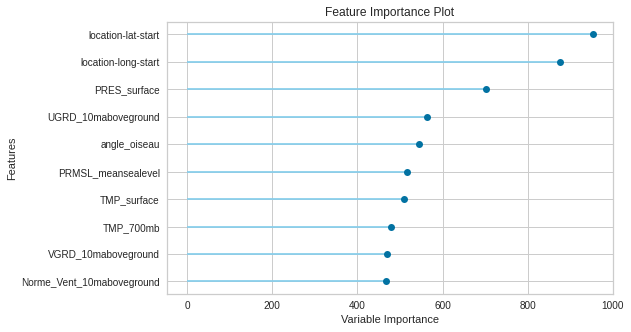

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

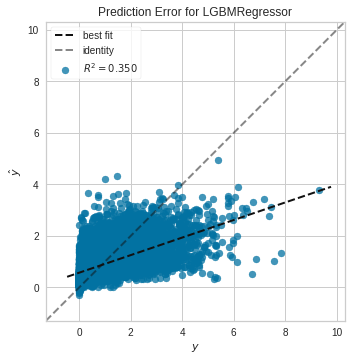

In [ ]:
plot_model(tuned_lightgbm, plot='error')

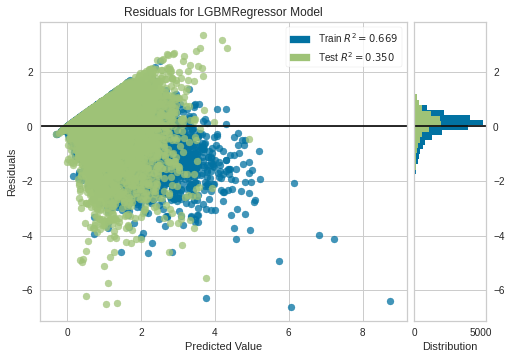

In [ ]:
plot_model(tuned_lightgbm)

In [ ]:
pred_test = predict_model(tuned_lightgbm)
pred_test[['VMOY', 'Label']].describe()

Model     MAE     MSE  ...      R2   RMSLE     MAPE
0  Light Gradient Boosting Machine  0.5138  0.6115  ...  0.3503  0.3291  241.144

[1 rows x 7 columns]

VMOY         Label
count  1.021600e+04  10216.000000
mean   8.603506e-01      0.867253
std    9.701690e-01      0.558697
min    8.233106e-07     -0.293000
25%    2.416578e-01      0.529200
50%    5.499094e-01      0.731900
75%    1.079577e+00      1.035450
max    9.313526e+00      4.931200

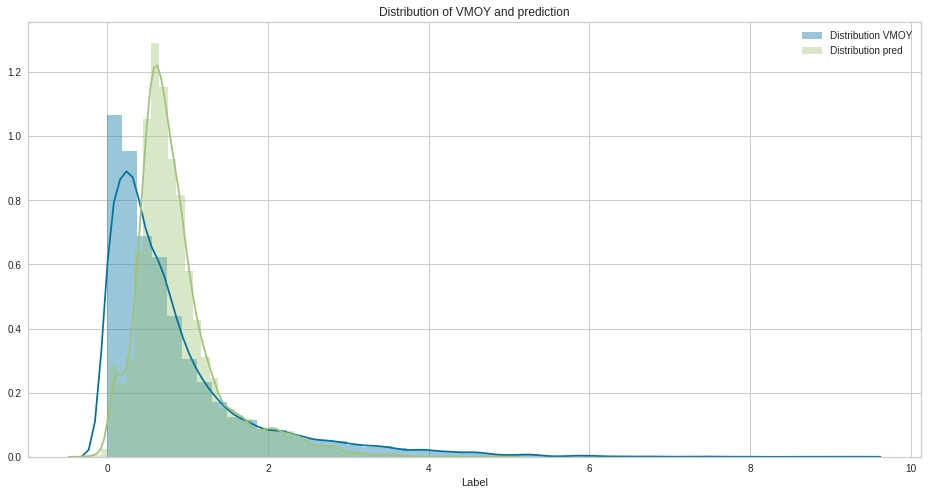

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(pred_test['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(pred_test['Label'], norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
model = tuned_lightgbm

pred_bird_1 = predict_model(model, data=df_bird_1)
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1[['VMOY', 'Label']].describe()

VMOY       Label
count  315.000000  315.000000
mean     0.657814    0.719555
std      0.554262    0.291061
min      0.038025    0.174200
25%      0.308398    0.507650
50%      0.526112    0.639800
75%      0.764508    0.869850
max      4.210736    2.341700

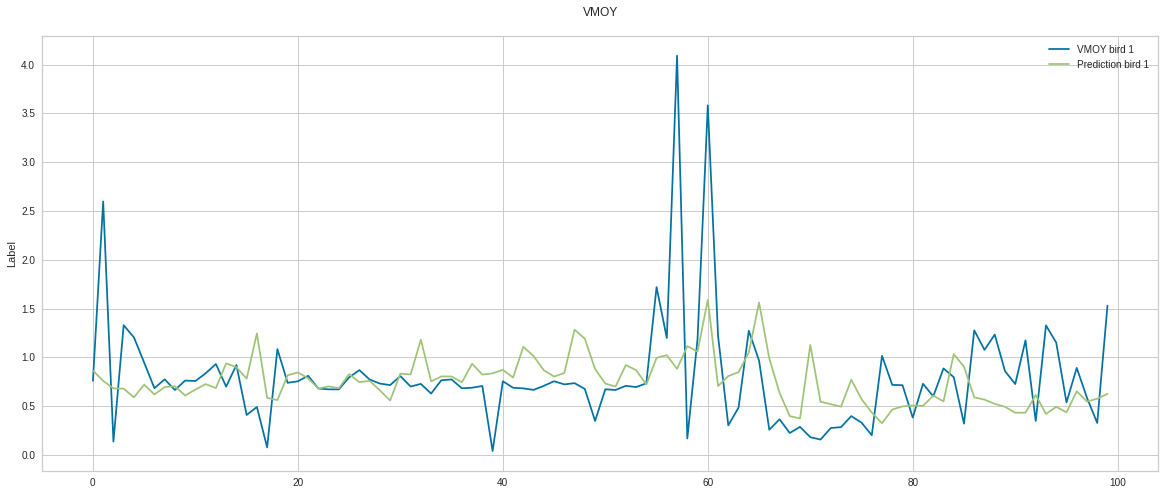

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

Decision Tree

In [ ]:
decision_tree = create_model('dt', fold=20)
print(decision_tree)

MAE     MSE    RMSE      R2   RMSLE       MAPE
0     0.6258  1.1074  1.0524 -0.2763  0.4190     5.4359
1     0.6226  1.0476  1.0235 -0.2581  0.4144     5.3327
2     0.6305  1.1576  1.0759 -0.2549  0.4220    42.8380
3     0.6596  1.2708  1.1273 -0.1562  0.4397    13.2581
4     0.6402  1.1911  1.0914 -0.2028  0.4325     4.5063
5     0.6484  1.2445  1.1156 -0.0445  0.4255    14.5438
6     0.6518  1.1410  1.0682 -0.3364  0.4450     3.8320
7     0.6097  1.0779  1.0382 -0.1331  0.4223     4.7334
8     0.6445  1.1302  1.0631 -0.0901  0.4266     2.9028
9     0.6297  1.1297  1.0629 -0.1191  0.4153     3.5045
10    0.6845  1.2940  1.1375 -0.4085  0.4436  1248.3559
11    0.6710  1.3571  1.1649 -0.5335  0.4471   101.9424
12    0.6709  1.3490  1.1615 -0.1852  0.4339     3.0634
13    0.6792  1.3545  1.1638 -0.4349  0.4523     5.0468
14    0.6073  1.1036  1.0505 -0.1324  0.4169     7.5411
15    0.6959  1.3790  1.1743 -0.2707  0.4490     4.0896
16    0.6377  1.2795  1.1311 -0.2106  0.4282     4.1665
17    0.6397  1.2485  1.1173 -0.3949  0.4233   438.4722
18    0.6136  1.1366  1.0661 -0.1632  0.4228   264.0634
19    0.6471  1.2639  1.1242 -0.1036  0.4376    20.5468
Mean  0.6455  1.2132  1.1005 -0.2355  0.4308   109.9088
SD    0.0245  0.1008  0.0457  0.1271  0.0117   282.1418

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=125, splitter='best')


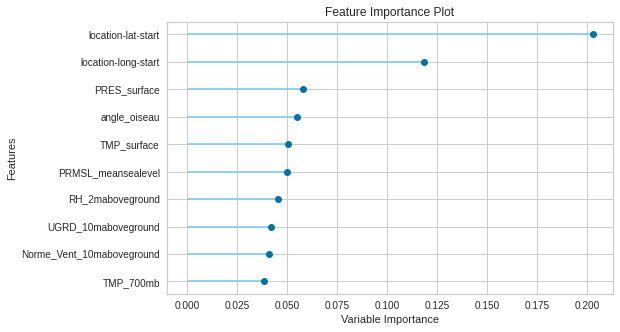

In [ ]:
plot_model(decision_tree, plot='feature')

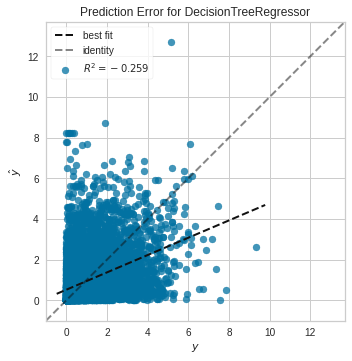

In [ ]:
plot_model(decision_tree, plot='error')

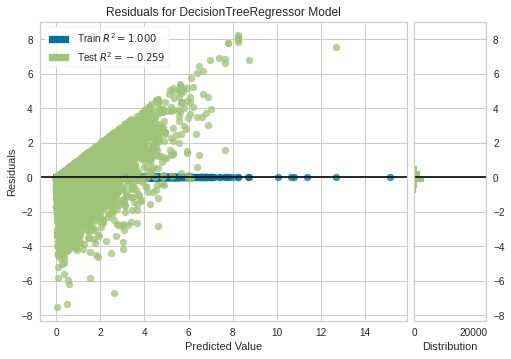

In [ ]:
plot_model(decision_tree)

In [ ]:
pred_test = predict_model(decision_tree)
pred_test[['VMOY', 'Label']].describe()

Model     MAE     MSE    RMSE      R2   RMSLE     MAPE
0  Decision Tree Regressor  0.6421  1.1846  1.0884 -0.2587  0.4304  71.2911

VMOY         Label
count  1.021600e+04  10216.000000
mean   8.603506e-01      0.891240
std    9.701690e-01      1.022122
min    8.233106e-07      0.000000
25%    2.416578e-01      0.246550
50%    5.499094e-01      0.565000
75%    1.079577e+00      1.111100
max    9.313526e+00     12.692300

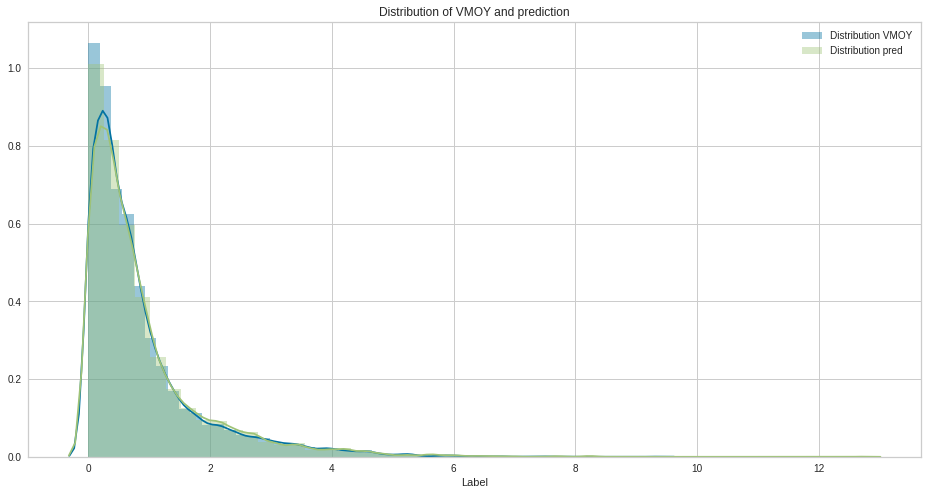

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(pred_test['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(pred_test['Label'], norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
model = decision_tree

pred_bird_1 = predict_model(model, data=df_bird_1)
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1[['VMOY', 'Label']].describe()

VMOY       Label
count  315.000000  315.000000
mean     0.657814    0.759769
std      0.554262    0.688433
min      0.038025    0.005900
25%      0.308398    0.325800
50%      0.526112    0.532800
75%      0.764508    0.913400
max      4.210736    4.502400

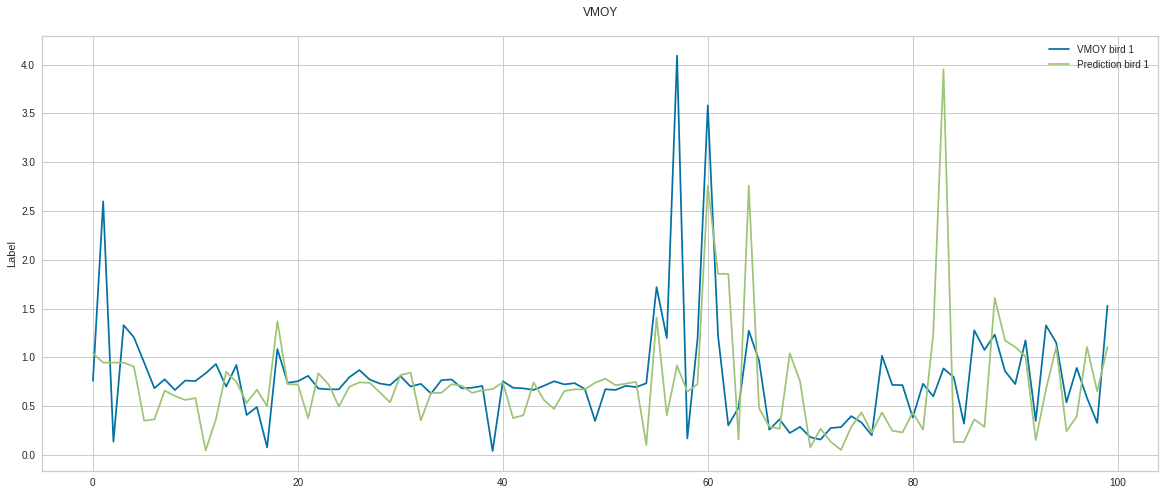

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

In [ ]:
decision_tree_boost = create_model('dt', fold=20, ensemble=True, method='Boosting')
print(decision_tree_boost)

MAE     MSE    RMSE      R2   RMSLE      MAPE
0     0.5034  0.7003  0.8368  0.1930  0.3489    6.7445
1     0.4640  0.6008  0.7751  0.2784  0.3267    7.1144
2     0.4941  0.7080  0.8414  0.2325  0.3402   16.1043
3     0.4956  0.7514  0.8668  0.3164  0.3362    6.1809
4     0.5034  0.7318  0.8555  0.2610  0.3525    3.1452
5     0.5205  0.9325  0.9657  0.2174  0.3531    4.6899
6     0.4791  0.6530  0.8081  0.2352  0.3360    2.5593
7     0.4846  0.6991  0.8361  0.2651  0.3359    2.5902
8     0.5182  0.7560  0.8695  0.2708  0.3433    5.7943
9     0.5061  0.8020  0.8955  0.2055  0.3506    3.0302
10    0.4928  0.6274  0.7921  0.3171  0.3343   67.1692
11    0.5032  0.7253  0.8517  0.1803  0.3467   28.8516
12    0.5241  0.8480  0.9209  0.2550  0.3466    6.0120
13    0.4874  0.7109  0.8432  0.2469  0.3379    5.8430
14    0.5061  0.7509  0.8665  0.2295  0.3480    4.6457
15    0.5249  0.8315  0.9119  0.2338  0.3544    1.3238
16    0.5163  0.8028  0.8960  0.2404  0.3483   14.2065
17    0.4989  0.6929  0.8324  0.2258  0.3393  110.1185
18    0.4776  0.7283  0.8534  0.2547  0.3314   69.7848
19    0.5197  0.8298  0.9109  0.2755  0.3532   44.9438
Mean  0.5010  0.7441  0.8615  0.2467  0.3432   20.5426
SD    0.0165  0.0776  0.0447  0.0347  0.0080   28.8938

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=125,
                                                       splitter='best'),
                

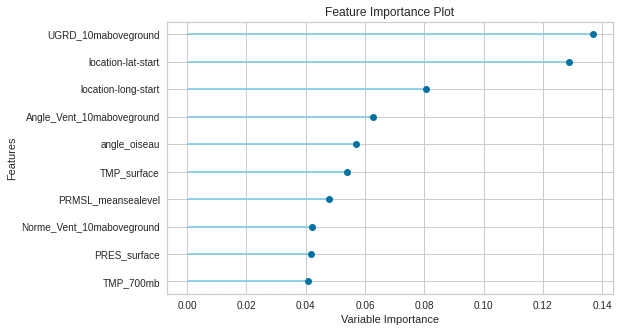

In [ ]:
plot_model(decision_tree_boost, plot='feature')

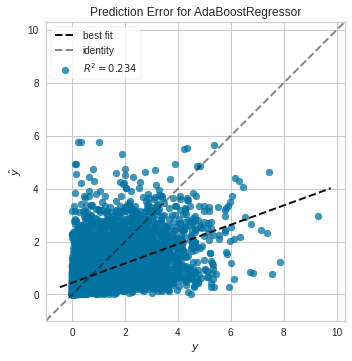

In [ ]:
plot_model(decision_tree_boost, plot='error')

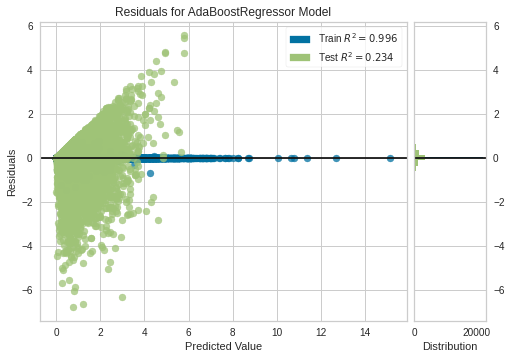

In [ ]:
plot_model(decision_tree_boost)

In [ ]:
pred_test = predict_model(decision_tree_boost)
pred_test[['VMOY', 'Label']].describe()

Model     MAE     MSE    RMSE      R2   RMSLE     MAPE
0  Ada Boost Regressor  0.5008  0.7205  0.8488  0.2344  0.3465  22.4839

VMOY         Label
count  1.021600e+04  10216.000000
mean   8.603506e-01      0.756645
std    9.701690e-01      0.675625
min    8.233106e-07      0.000000
25%    2.416578e-01      0.335375
50%    5.499094e-01      0.588950
75%    1.079577e+00      0.929150
max    9.313526e+00      5.777900

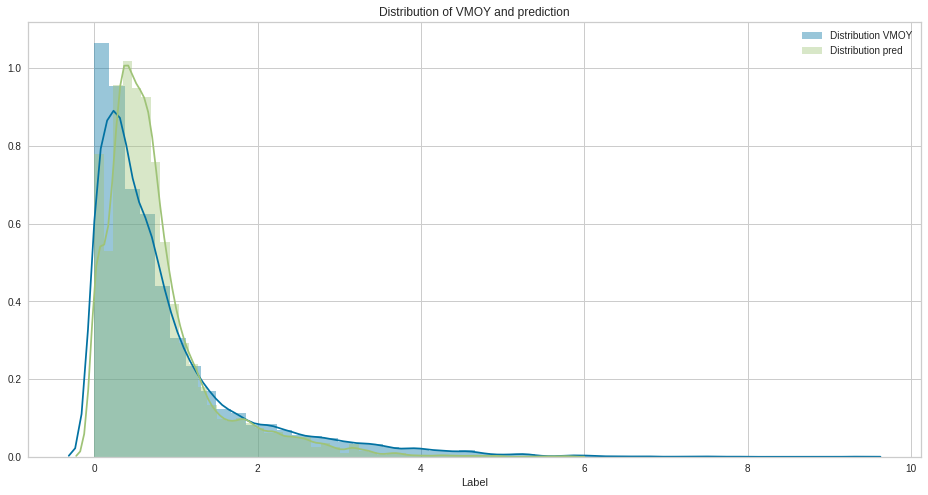

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(pred_test['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(pred_test['Label'], norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
model = decision_tree_boost

pred_bird_1 = predict_model(model, data=df_bird_1)
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1[['VMOY', 'Label']].describe()

VMOY       Label
count  315.000000  315.000000
mean     0.657814    0.624755
std      0.554262    0.390068
min      0.038025    0.112400
25%      0.308398    0.356250
50%      0.526112    0.535300
75%      0.764508    0.775650
max      4.210736    3.716200

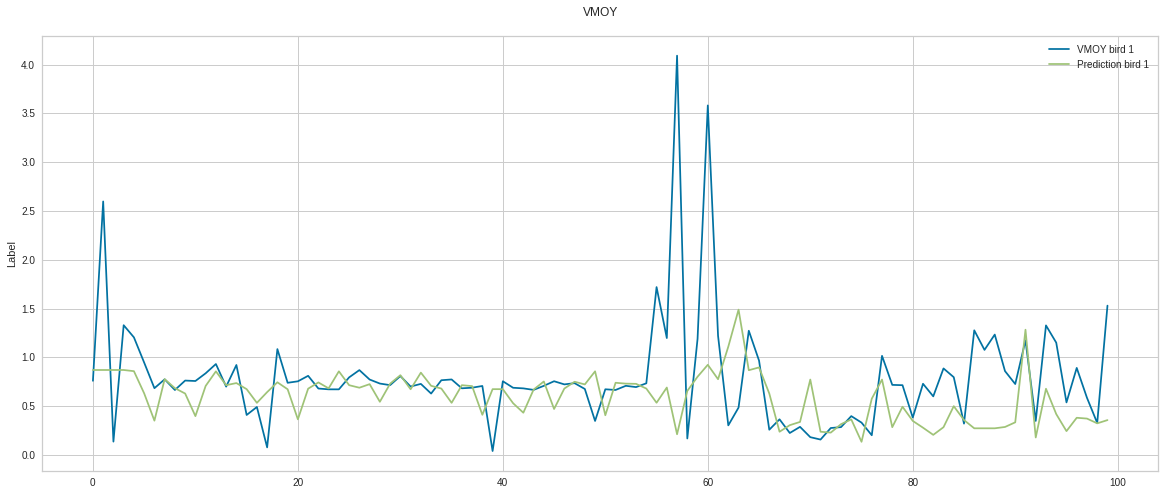

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

Tuned Decision Tree

In [ ]:
tuned_decision_tree = tune_model(estimator='dt', fold=10, n_iter=10,
                                 optimize='r2')

MAE     MSE    RMSE      R2   RMSLE       MAPE
0     0.6287  0.7669  0.8757  0.0980  0.3977   408.2385
1     0.6513  0.9376  0.9683  0.0724  0.4102   512.3680
2     0.6643  1.0237  1.0118  0.0619  0.4171   205.4195
3     0.6333  0.8115  0.9009  0.1010  0.3997   832.3044
4     0.6606  0.9543  0.9769  0.0676  0.4134   541.0828
5     0.6329  0.8493  0.9216  0.0583  0.4007   870.1761
6     0.6558  0.9705  0.9851  0.0693  0.4094   555.9217
7     0.6534  0.9554  0.9774  0.0730  0.4084  1365.2077
8     0.6595  0.9338  0.9663  0.0430  0.4131   779.0697
9     0.6539  0.9933  0.9967  0.0641  0.4120  1006.1314
Mean  0.6494  0.9196  0.9581  0.0709  0.4082   707.5920
SD    0.0122  0.0786  0.0417  0.0165  0.0062   316.1189

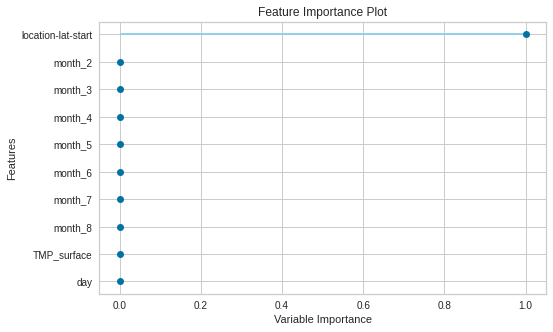

In [ ]:
plot_model(tuned_decision_tree, plot='feature')

In [ ]:
model = tuned_decision_tree

pred_bird_1 = predict_model(model, data=df_bird_1)
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1[['VMOY', 'Label']].describe()

VMOY         Label
count  315.000000  3.150000e+02
mean     0.657814  8.069000e-01
std      0.554262  6.115942e-15
min      0.038025  8.069000e-01
25%      0.308398  8.069000e-01
50%      0.526112  8.069000e-01
75%      0.764508  8.069000e-01
max      4.210736  8.069000e-01

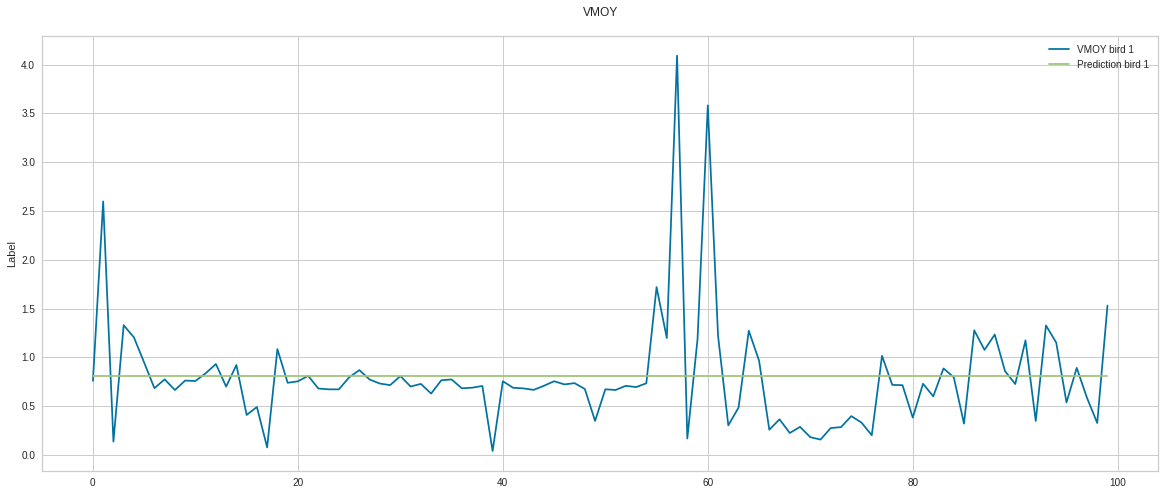

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

Extra tree regressor

In [ ]:
extra_tree_reg = create_model('et', fold=20)
print(extra_tree_reg)

MAE     MSE    RMSE      R2   RMSLE      MAPE
0     0.5075  0.5803  0.7618  0.3312  0.3321   62.5280
1     0.4675  0.4752  0.6894  0.4293  0.3098   73.5633
2     0.4925  0.5729  0.7569  0.3789  0.3223   67.8262
3     0.5180  0.6870  0.8288  0.3750  0.3286   56.6014
4     0.5253  0.6872  0.8290  0.3060  0.3420    9.9197
5     0.5254  0.7713  0.8782  0.3527  0.3313   19.0058
6     0.4914  0.5792  0.7610  0.3217  0.3247   40.6730
7     0.4939  0.6086  0.7801  0.3602  0.3180   70.6493
8     0.5199  0.6699  0.8185  0.3539  0.3292   37.2630
9     0.5146  0.6725  0.8200  0.3339  0.3323  247.8265
10    0.4924  0.5432  0.7370  0.4088  0.3165  168.6247
11    0.4975  0.6102  0.7812  0.3104  0.3264  104.6929
12    0.5428  0.7508  0.8665  0.3404  0.3369  178.4302
13    0.5048  0.6309  0.7943  0.3316  0.3289  110.6347
14    0.4956  0.6292  0.7932  0.3543  0.3228  101.0100
15    0.5330  0.7224  0.8500  0.3343  0.3343  192.1302
16    0.5042  0.6449  0.8031  0.3898  0.3222   74.8372
17    0.4866  0.5557  0.7454  0.3791  0.3168  241.9195
18    0.4648  0.5751  0.7584  0.4114  0.3056   66.9302
19    0.5361  0.7607  0.8722  0.3358  0.3450  225.4311
Mean  0.5057  0.6364  0.7963  0.3569  0.3263  107.5248
SD    0.0208  0.0770  0.0485  0.0335  0.0097   72.7389

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=125, verbose=0, warm_start=False)


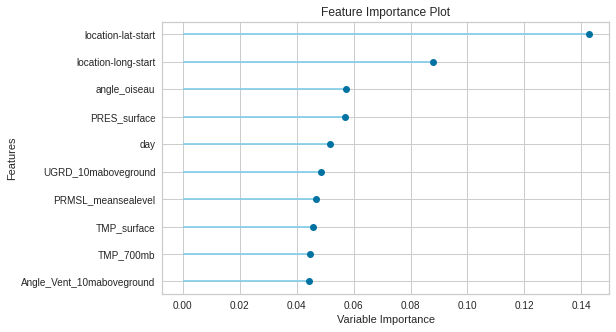

In [ ]:
plot_model(extra_tree_reg, plot='feature')

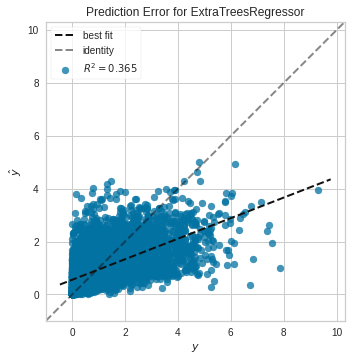

In [ ]:
plot_model(extra_tree_reg, plot='error')

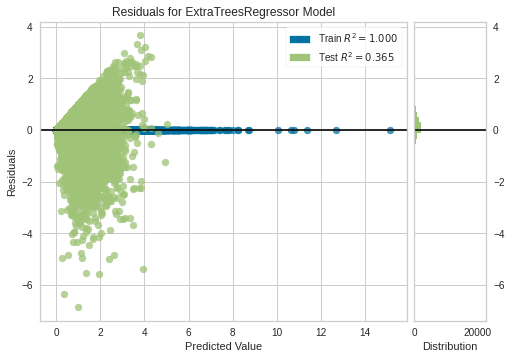

In [ ]:
plot_model(extra_tree_reg)

In [ ]:
pred_test = predict_model(decision_tree_boost)
pred_test[['VMOY', 'Label']].describe()

Model     MAE     MSE    RMSE      R2   RMSLE     MAPE
0  Ada Boost Regressor  0.5008  0.7205  0.8488  0.2344  0.3465  22.4839

VMOY         Label
count  1.021600e+04  10216.000000
mean   8.603506e-01      0.756645
std    9.701690e-01      0.675625
min    8.233106e-07      0.000000
25%    2.416578e-01      0.335375
50%    5.499094e-01      0.588950
75%    1.079577e+00      0.929150
max    9.313526e+00      5.777900

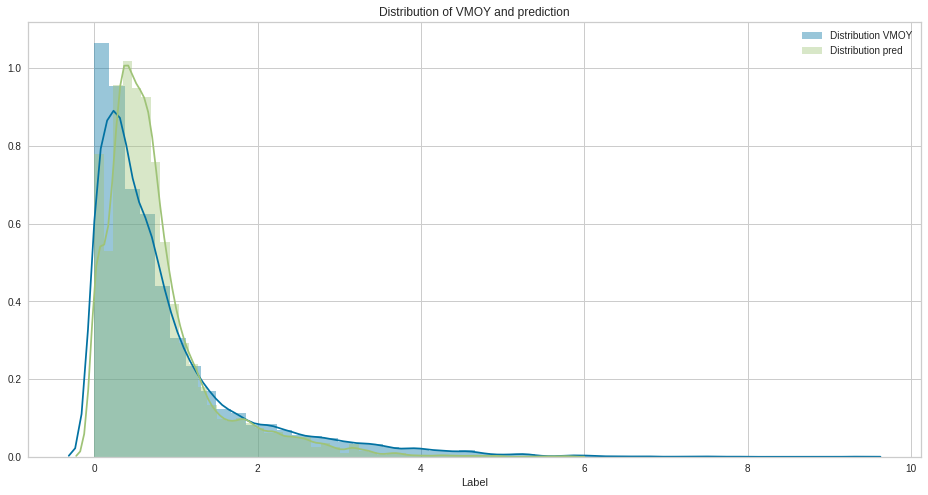

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(pred_test['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(pred_test['Label'], norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
model = decision_tree_boost

pred_bird_1 = predict_model(model, data=df_bird_1)
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1[['VMOY', 'Label']].describe()

VMOY       Label
count  315.000000  315.000000
mean     0.657814    0.624755
std      0.554262    0.390068
min      0.038025    0.112400
25%      0.308398    0.356250
50%      0.526112    0.535300
75%      0.764508    0.775650
max      4.210736    3.716200

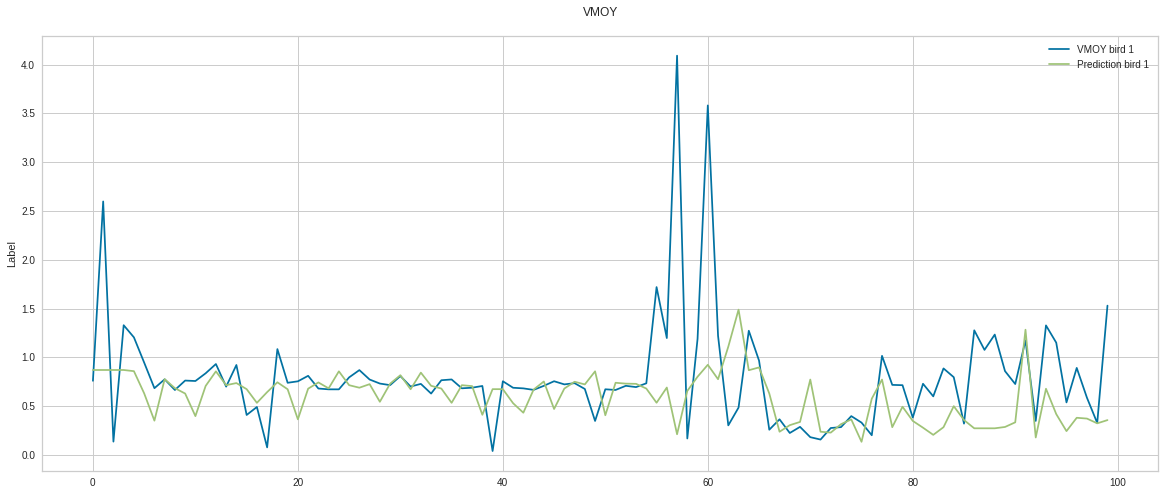

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

Random Forest

In [ ]:
random_forest = create_model(estimator='rf', fold=10)
print(random_forest)

MAE     MSE    RMSE      R2   RMSLE      MAPE
0     0.4825  0.5153  0.7179  0.3939  0.3176   86.0601
1     0.5052  0.6443  0.8027  0.3626  0.3242  153.0980
2     0.5190  0.7351  0.8574  0.3264  0.3346   23.1539
3     0.4935  0.6073  0.7793  0.3273  0.3242  132.8667
4     0.5125  0.6582  0.8113  0.3569  0.3246  132.4206
5     0.4946  0.5881  0.7669  0.3479  0.3210  239.7561
6     0.5171  0.7067  0.8407  0.3222  0.3303  194.1707
7     0.5111  0.6670  0.8167  0.3528  0.3249  311.6667
8     0.4980  0.6372  0.7982  0.3470  0.3203  216.3075
9     0.4989  0.6688  0.8178  0.3699  0.3233  225.4417
Mean  0.5032  0.6428  0.8009  0.3507  0.3245  171.4942
SD    0.0111  0.0589  0.0373  0.0209  0.0046   78.9949

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=125, verbose=0, warm_start=False)


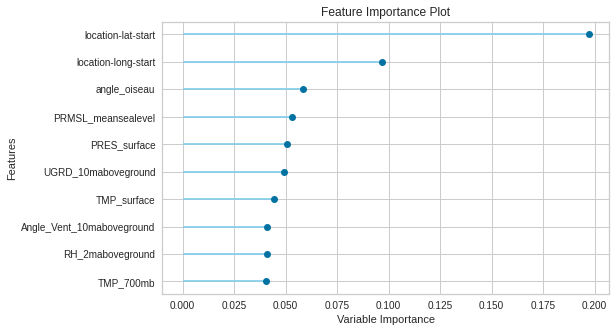

In [ ]:
plot_model(random_forest, plot='feature')

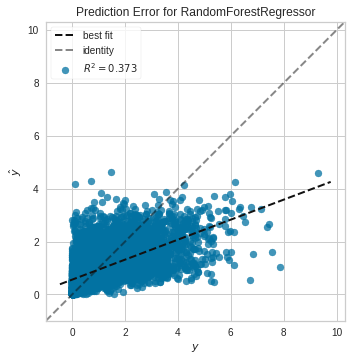

In [ ]:
plot_model(random_forest, plot='error')

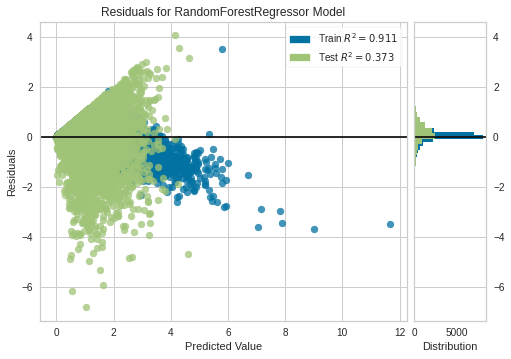

In [ ]:
plot_model(random_forest)

In [ ]:
pred_test = predict_model(random_forest)
pred_test[['VMOY', 'Label']].describe()

Model     MAE     MSE    RMSE     R2   RMSLE    MAPE
0  Random Forest Regressor  0.4926  0.5901  0.7682  0.373  0.3201  141.26

VMOY         Label
count  1.021600e+04  10216.000000
mean   8.603506e-01      0.884251
std    9.701690e-01      0.600206
min    8.233106e-07      0.000000
25%    2.416578e-01      0.506200
50%    5.499094e-01      0.751700
75%    1.079577e+00      1.098650
max    9.313526e+00      4.625300

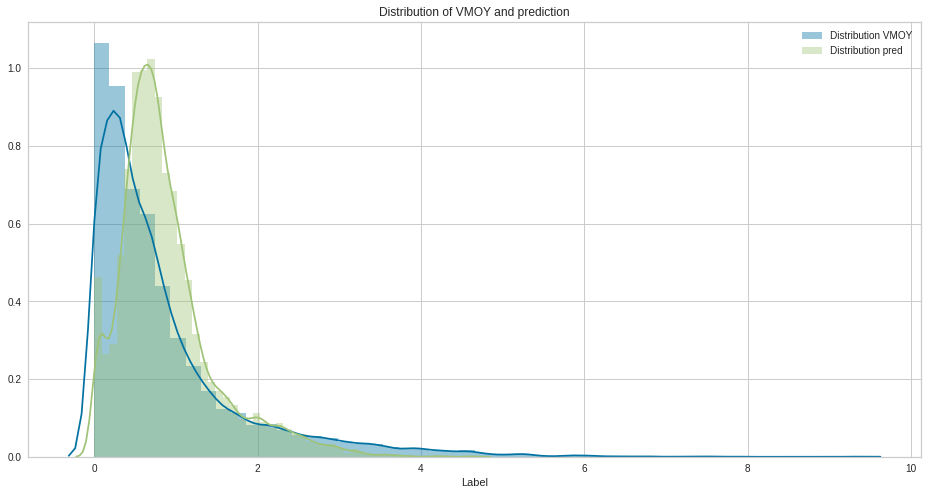

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(pred_test['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(pred_test['Label'], norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
model = random_forest

pred_bird_1 = predict_model(model, data=df_bird_1)
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1[['VMOY', 'Label']].describe()

VMOY       Label
count  315.000000  315.000000
mean     0.657814    0.703916
std      0.554262    0.340265
min      0.038025    0.232400
25%      0.308398    0.495000
50%      0.526112    0.623900
75%      0.764508    0.829750
max      4.210736    2.855300

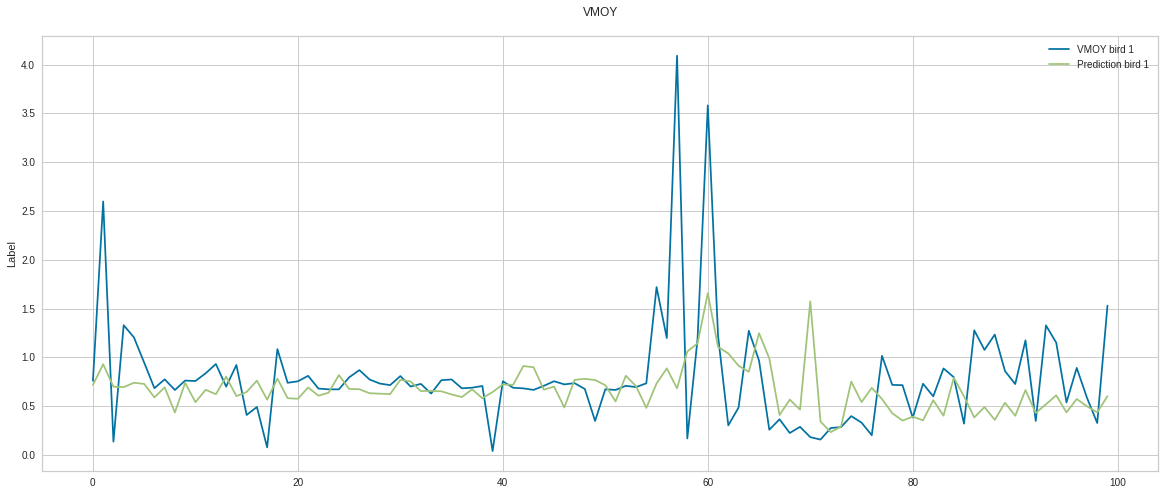

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

Random Forest Boost

In [ ]:
random_forest_boost = create_model(estimator='rf', fold=10, ensemble=True, method='Boosting')
print(random_forest_boost)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                    

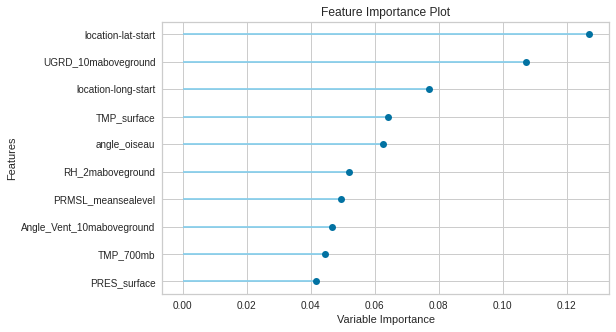

In [ ]:
plot_model(random_forest_boost, plot='feature')

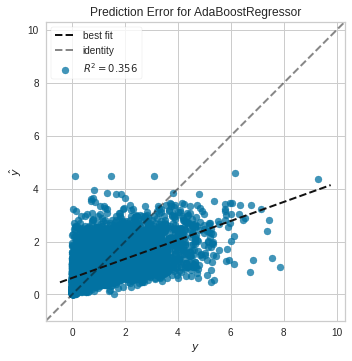

In [ ]:
plot_model(random_forest_boost, plot='error')

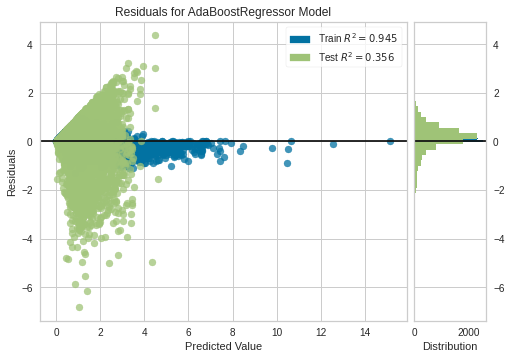

In [ ]:
plot_model(random_forest_boost)

In [ ]:
pred_test = predict_model(random_forest_boost)
pred_test[['VMOY', 'Label']].describe()

Model     MAE     MSE    RMSE      R2   RMSLE     MAPE
0  Ada Boost Regressor  0.5228  0.6057  0.7782  0.3564  0.3327  232.773

VMOY         Label
count  1.021600e+04  10216.000000
mean   8.603506e-01      0.932309
std    9.701690e-01      0.579174
min    8.233106e-07      0.010900
25%    2.416578e-01      0.577175
50%    5.499094e-01      0.799100
75%    1.079577e+00      1.130600
max    9.313526e+00      4.597500

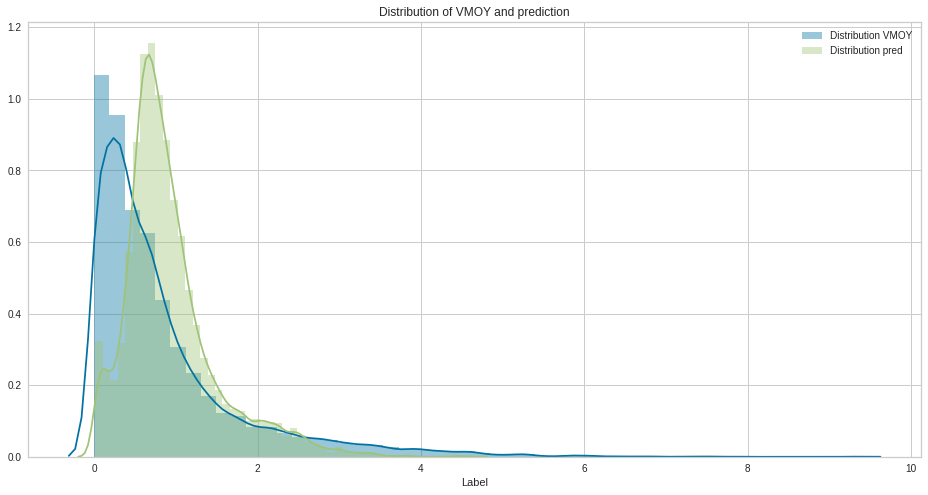

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(pred_test['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(pred_test['Label'], norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
model = random_forest_boost

pred_bird_1 = predict_model(model, data=df_bird_1)
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1[['VMOY', 'Label']].describe()

VMOY       Label
count  315.000000  315.000000
mean     0.657814    0.743557
std      0.554262    0.302720
min      0.038025    0.282000
25%      0.308398    0.531850
50%      0.526112    0.673300
75%      0.764508    0.898100
max      4.210736    2.497400

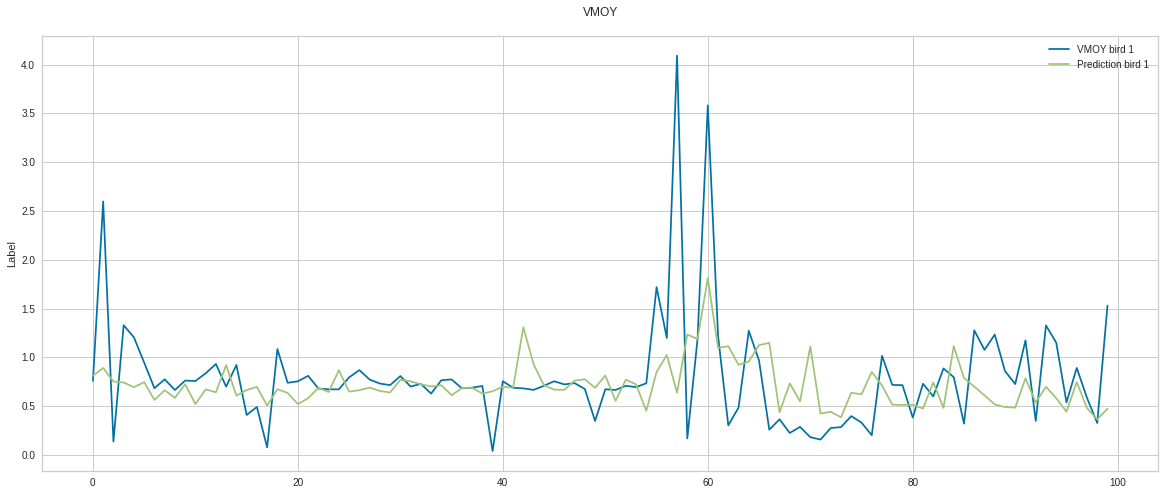

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

Tuned Random Forest

In [ ]:
tuned_xgboost = tune_model('xgboost', fold=10, n_iter=5)
print(tuned_xgboost)

MAE     MSE    RMSE      R2   RMSLE      MAPE
0     0.5755  0.8611  0.9279  0.0749  0.3742  292.1116
1     0.5861  0.9395  0.9693  0.0583  0.3814  345.2186
2     0.5898  0.9168  0.9575  0.0478  0.3813  457.3199
3     0.5923  0.9884  0.9942  0.0465  0.3846  646.7942
4     0.5924  0.9678  0.9838  0.0498  0.3846  581.3412
Mean  0.5872  0.9347  0.9665  0.0555  0.3812  464.5571
SD    0.0063  0.0442  0.0230  0.0106  0.0038  134.8187

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=2, missing=None, n_estimators=50,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=125,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.1, verbosity=0)


## **Création et réglage des modèles du 19/06**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import xgboost
from xgboost import XGBRegressor

import lightgbm
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('VMOY', axis=1), data['VMOY'], test_size=0.2, random_state=42)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# A parameter grid for XGBoost
params = {
        'min_child_weight': [2, 5, 7, 8],
        'gamma': [1, 1.5, 2, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
        'n_estimators': [800, 900, 1000],
        'max_depth': [12, 14, 16]
        }
###    XGBOOST
# Best hyperparameters:
# {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'gamma': 1.5, 'colsample_bytree': 0.6}

#  Best hyperparameters:
# {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 5, 'max_depth': 12, 'gamma': 2, 'colsample_bytree': 0.8}

# Best hyperparameters:
# {'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 7, 'max_depth': 14, 'gamma': 2, 'colsample_bytree': 0.8}



###    LightGBM
# Best hyperparameters:
# {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 5, 'max_depth': 12, 'gamma': 2, 'colsample_bytree': 0.8}

# Best hyperparameters:
# {'subsample': 0.8, 'n_estimators': 700, 'min_child_weight': 5, 'max_depth': 10, 'gamma': 1, 'colsample_bytree': 1.0}

#  Best hyperparameters:
# {'subsample': 0.6, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 12, 'gamma': 2, 'colsample_bytree': 0.8}

# Best hyperparameters:
# {'subsample': 0.6, 'n_estimators': 900, 'min_child_weight': 5, 'max_depth': 14, 'gamma': 2, 'colsample_bytree': 0.8}

# Best hyperparameters:
# {'subsample': 1.0, 'n_estimators': 1000, 'min_child_weight': 7, 'max_depth': 14, 'gamma': 1.5, 'colsample_bytree': 0.8}

In [ ]:
xgboost_reg = XGBRegressor(objective='reg:squarederror', verbose=True,
                  learning_rate=0.05, n_jobs=-1) #booster='gbtree' , tree_method='gpu_hist'

In [ ]:
lightgbm_reg = LGBMRegressor(objective='regression', verbose=10,
                  learning_rate=0.05, n_jobs=-1) #booster='gbtree' , tree_method='gpu_hist'

In [ ]:
# XGBoost

# Best hyperparameters:
# {'subsample': 1.0, 'n_estimators': 1000, 'min_child_weight': 7, 'max_depth': 12, 'gamma': 1.5, 'colsample_bytree': 1.0}

params = {
        'min_child_weight': [7],
        'gamma': [1.5],
        'subsample': [0.8], #0.8
        'colsample_bytree': [1.0], #0.8
        'n_estimators': [1000],
        'max_depth': [12]
        }

folds = 10 
param_comb = 1

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search_xgb = RandomizedSearchCV(xgboost_reg, param_distributions=params, n_iter=param_comb, 
                                  scoring='neg_mean_squared_error', n_jobs=-1, cv=10, verbose=10, random_state=125)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_xgb.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 14.9min finished



 Time taken: 0 hours 16 minutes and 35.63 seconds.


In [ ]:
# LightGBM

folds = 10 
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search_lgbm = RandomizedSearchCV(lightgbm_reg, param_distributions=params, n_iter=param_comb, 
                                  scoring='neg_mean_squared_error', n_jobs=-1, cv=10, verbose=10, random_state=125)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_lgbm.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.7min finished



 Time taken: 0 hours 5 minutes and 45.99 seconds.


In [ ]:
print('\n All results: XGBoost')
print(random_search_xgb.cv_results_)
print('\n Best estimator:')
print(random_search_xgb.best_estimator_)
print('\n Best mean squared error score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search_xgb.best_score_ ) #* 2 - 1
print('\n Best hyperparameters:')
print(random_search_xgb.best_params_)
results_xgb = pd.DataFrame(random_search_xgb.cv_results_)
results_xgb.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results: XGBoost
{'mean_fit_time': array([177.20593803]), 'std_fit_time': array([0.71660615]), 'mean_score_time': array([0.72228153]), 'std_score_time': array([0.02618817]), 'param_subsample': masked_array(data=[0.8],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[7],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[12],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.5],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_colsample_bytree': masked_array(data=[1.0],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 7, 'max_dep

In [ ]:
print('\n All results: LightGBM')
print(random_search_lgbm.cv_results_)
print('\n Best estimator:')
print(random_search_lgbm.best_estimator_)
print('\n Best mean squared error score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search_lgbm.best_score_ ) #* 2 - 1
print('\n Best hyperparameters:')
print(random_search_lgbm.best_params_)
results_lgbm = pd.DataFrame(random_search_lgbm.cv_results_)
results_lgbm.to_csv('lightgbm-random-grid-search-results-01.csv', index=False)


 All results: LightGBM
{'mean_fit_time': array([7.17037601, 5.56408429, 7.33997812, 8.07604675, 6.70890381,
       5.67602239, 8.09961746, 6.75759904, 4.58560755, 4.30638275]), 'std_fit_time': array([0.4836034 , 0.17113917, 0.16158623, 0.25242202, 0.21497884,
       0.22867488, 0.14053017, 0.22496061, 0.17630689, 0.32149853]), 'mean_score_time': array([0.34971778, 0.2713074 , 0.33214502, 0.3797184 , 0.29444005,
       0.31198862, 0.36720679, 0.28701353, 0.29639702, 0.40028949]), 'std_score_time': array([0.02640018, 0.02379686, 0.0164584 , 0.0163861 , 0.01408019,
       0.02006882, 0.02634659, 0.01068908, 0.01639025, 0.05379983]), 'param_subsample': masked_array(data=[1.0, 0.8, 1.0, 1.0, 0.8, 0.6, 0.6, 0.8, 0.6, 0.8],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[1000, 800, 900, 1000, 800, 800, 1000, 800, 800, 1000],
             mask

In [ ]:
# Training a classifier with the best parameters
xgb_reg = random_search_xgb.best_estimator_  

## Re-Processing train test split if wanted
# xtrain_cv, xtest_cv, ytrain_cv, ytest_cv = train_test_split(xtrain, ytrain, test_size=0.3, random_state=42)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
xgb_reg.fit(data.drop('VMOY', axis=1), data['VMOY']) # X_train, y_train
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 2 minutes and 10.8 seconds.


In [ ]:
# Training a classifier with the best parameters
lgbm_reg = random_search_lgbm.best_estimator_  

## Re-Processing train test split if wanted
# xtrain_cv, xtest_cv, ytrain_cv, ytest_cv = train_test_split(xtrain, ytrain, test_size=0.3, random_state=42)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
lgbm_reg.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 4.48 seconds.


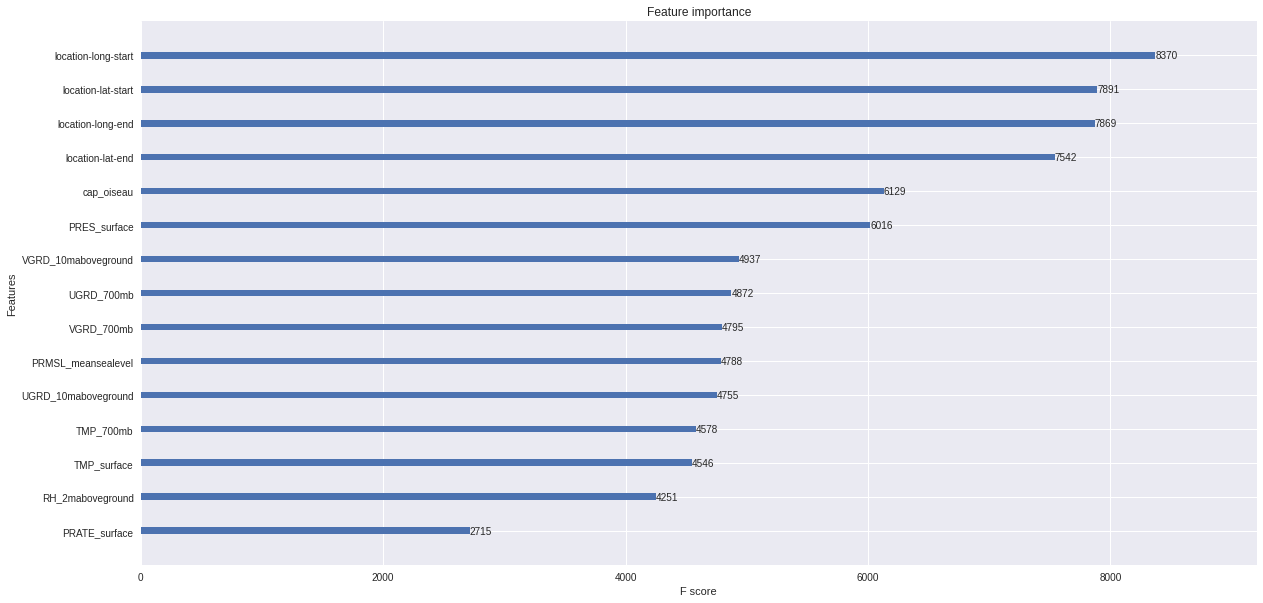

In [ ]:
# Ploting the feature importance
xgboost.plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

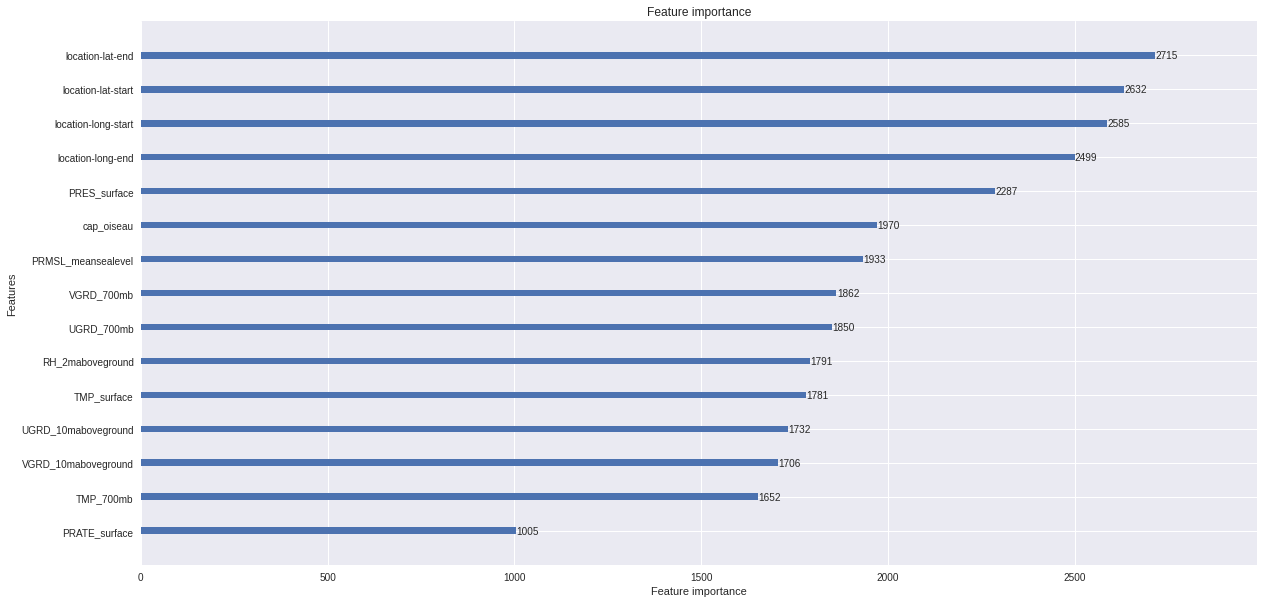

In [ ]:
# Ploting the feature importance
lightgbm.plot_importance(lgbm_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.853796 to fit


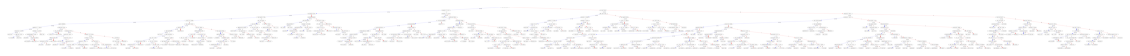

In [ ]:
xgboost.plot_tree(xgb_reg,num_trees=0)
plt.show()

In [ ]:
lightgbm.plot_tree(lgbm_reg,num_trees=0)
plt.show()

In [ ]:
y_pred_xgb = pd.DataFrame(xgb_reg.predict(X_test))
y_pred_xgb

0
0     0.493455
1     0.619685
2     1.627548
3     0.446995
4     0.108075
...        ...
6669  0.798687
6670 -0.012260
6671  1.316564
6672  0.722855
6673  0.491688

[6674 rows x 1 columns]

In [ ]:
y_pred_lgbm = pd.DataFrame(lgbm_reg.predict(X_test))
y_pred_lgbm

0
0     0.743278
1     0.496472
2     0.742186
3     1.169055
4     0.516455
...        ...
6692  3.297080
6693  0.832314
6694  0.654935
6695  0.646310
6696  0.731395

[6697 rows x 1 columns]

In [ ]:
data_unseen[['VMOY']].describe()

VMOY
count  8343.000000
mean      1.491779
std       2.863484
min       0.000874
25%       0.255814
50%       0.574806
75%       1.174598
max      33.891601

In [ ]:
y_pred_xgb_unseen = pd.DataFrame(xgb_reg.predict(data_unseen.drop('VMOY', axis=1)))
y_pred_xgb_unseen.describe()

0
count  8343.000000
mean      1.459603
std       2.411004
min      -0.677162
25%       0.459222
50%       0.738322
75%       1.196882
max      19.418604

In [ ]:
y_pred_lgbm_unseen = pd.DataFrame(lgbm_reg.predict(data_unseen.drop('VMOY', axis=1)))
y_pred_lgbm_unseen.describe()

0
count  8371.000000
mean      1.467051
std       2.347311
min      -1.562266
25%       0.523938
50%       0.760014
75%       1.219015
max      20.748646

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("R2: %f" % (r2))

MAE: 0.658185
MSE: 1.761241
R2: 0.787367


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(data_unseen['VMOY'], y_pred_xgb_unseen)
mse = mean_squared_error(data_unseen['VMOY'], y_pred_xgb_unseen)
r2 = r2_score(data_unseen['VMOY'], y_pred_xgb_unseen)
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("R2: %f" % (r2))

MAE: 0.624623
MSE: 1.595761
R2: 0.805361


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lgbm)
mse = mean_squared_error(y_test, y_pred_lgbm)
r2 = r2_score(y_test, y_pred_lgbm)
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("R2: %f" % (r2))

MAE: 0.759166
MSE: 2.129520
R2: 0.745070


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(data_unseen['VMOY'], y_pred_lgbm_unseen)
mse = mean_squared_error(data_unseen['VMOY'], y_pred_lgbm_unseen)
r2 = r2_score(data_unseen['VMOY'], y_pred_lgbm_unseen)
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("R2: %f" % (r2))

MAE: 0.747048
MSE: 2.192829
R2: 0.746787


In [ ]:
y_pred_xgb.describe()

0
count  6674.000000
mean      1.458950
std       2.395029
min      -1.193347
25%       0.480564
50%       0.749276
75%       1.214957
max      23.659132

In [ ]:
y_pred_lgbm.describe()

0
count  6697.000000
mean      1.483496
std       2.317635
min      -1.678302
25%       0.523147
50%       0.770220
75%       1.259619
max      20.450760

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.describe()

VMOY
count  6674.000000
mean      1.496392
std       2.878240
min       0.000841
25%       0.261446
50%       0.589981
75%       1.186055
max      26.064159

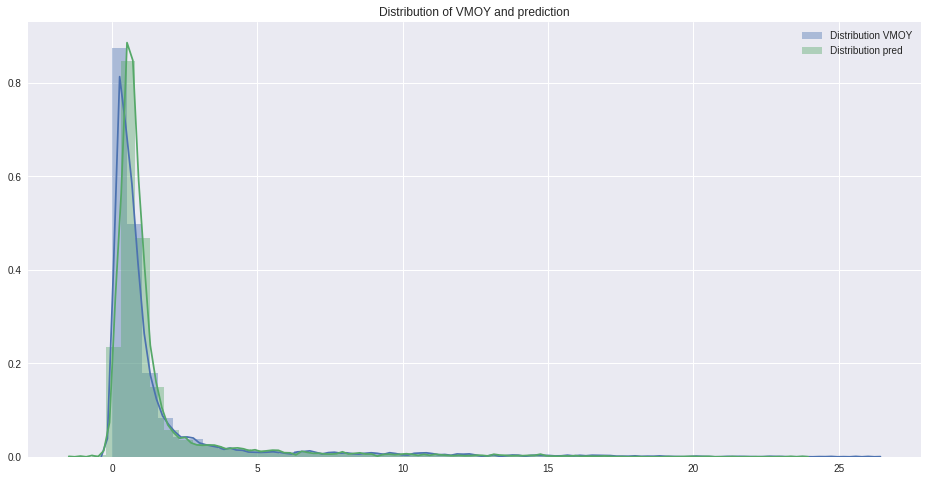

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(y_test, norm_hist=True, label='Distribution VMOY')
sns.distplot(y_pred_xgb, norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

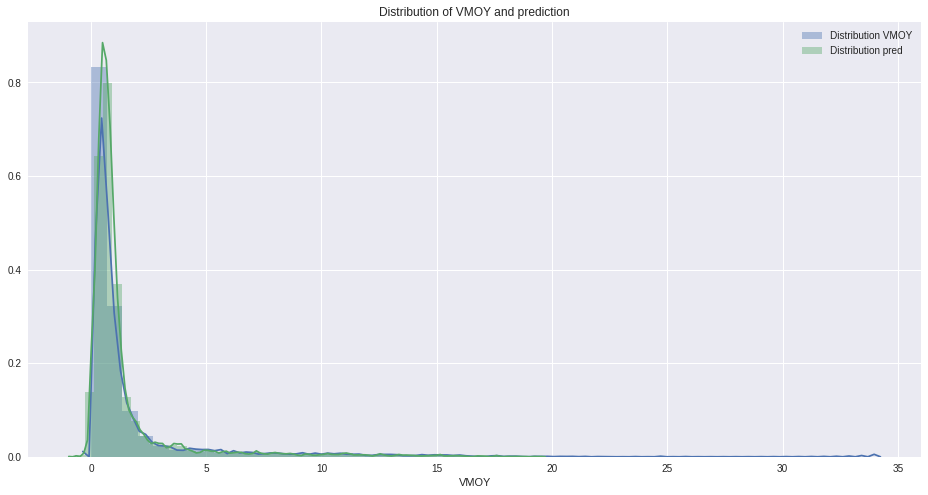

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(data_unseen['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(y_pred_xgb_unseen, norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

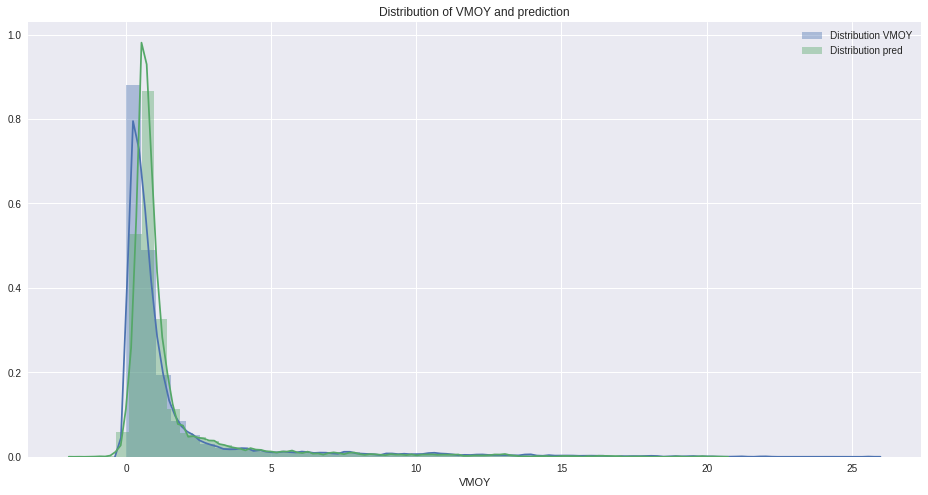

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(y_test, norm_hist=True, label='Distribution VMOY')
sns.distplot(y_pred_lgbm, norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

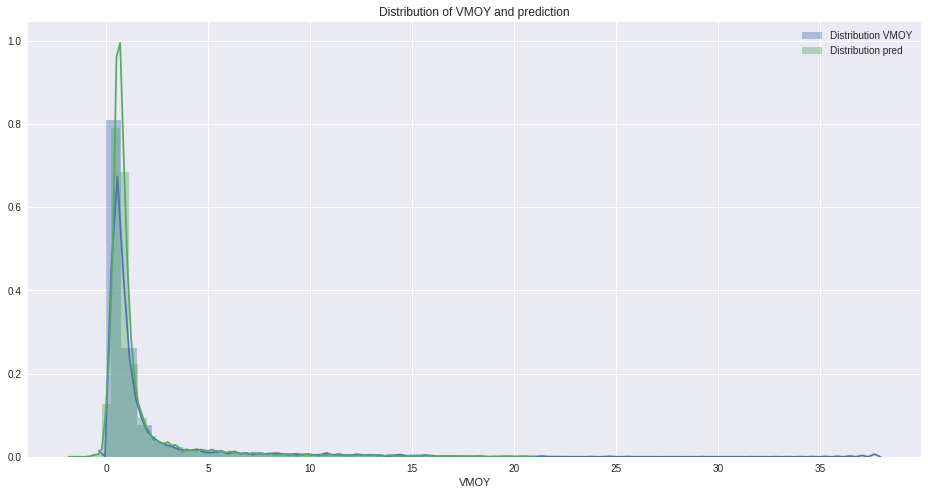

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(data_unseen['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(y_pred_lgbm_unseen, norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
pred_bird_1_xgb = pd.DataFrame(xgb_reg.predict(df_bird_1.drop(['VMOY', 'tag-local-identifier', 'year', 'month', 'day', 
                                                                 'Norme_Vent_10maboveground',	'Norme_Vent_700mb',	
                                                                 'Angle_Vent_10maboveground', 'Angle_Vent_700mb'], axis=1)))
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1_xgb.describe()

0
count  315.000000
mean     1.009783
std      1.687774
min      0.048068
25%      0.487864
50%      0.633059
75%      0.884480
max     13.503979

In [ ]:
df_bird_1[['VMOY']].describe()

VMOY
count  315.000000
mean     0.922937
std      1.782964
min      0.038025
25%      0.311182
50%      0.529977
75%      0.765926
max     13.460609

In [ ]:
pred_bird_1_lgbm = pd.DataFrame(lgbm_reg.predict(df_bird_1.drop(['VMOY', 'tag-local-identifier', 'year', 'month', 'day', 
                                                                 'Norme_Vent_10maboveground',	'Norme_Vent_700mb',	
                                                                 'Angle_Vent_10maboveground', 'Angle_Vent_700mb'], axis=1)))
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1_lgbm.describe()

0
count  315.000000
mean     1.016680
std      1.668296
min      0.134604
25%      0.505220
50%      0.695174
75%      0.871799
max     13.874916

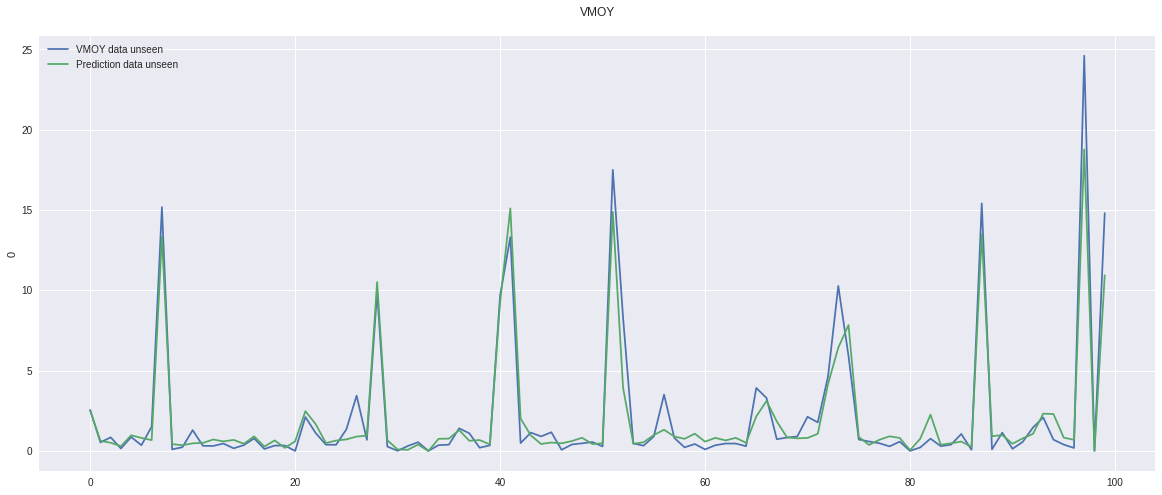

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), data_unseen['VMOY'].iloc[200:300], label='VMOY data unseen') # pred_bird_1.shape[0]
sns.lineplot(range(100), y_pred_xgb_unseen[0].iloc[200:300], label='Prediction data unseen') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

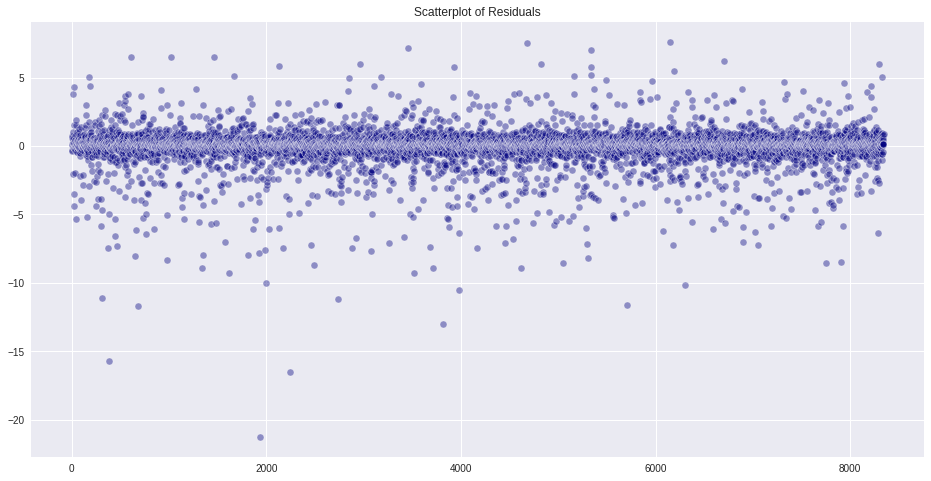

In [ ]:
residuals = y_pred_xgb_unseen[0] - data_unseen['VMOY']

plt.figure(figsize=(16,8))
sns.scatterplot(range(data_unseen.shape[0]), residuals, color='Navy', alpha=0.4)
plt.title("Scatterplot of Residuals")
plt.show()

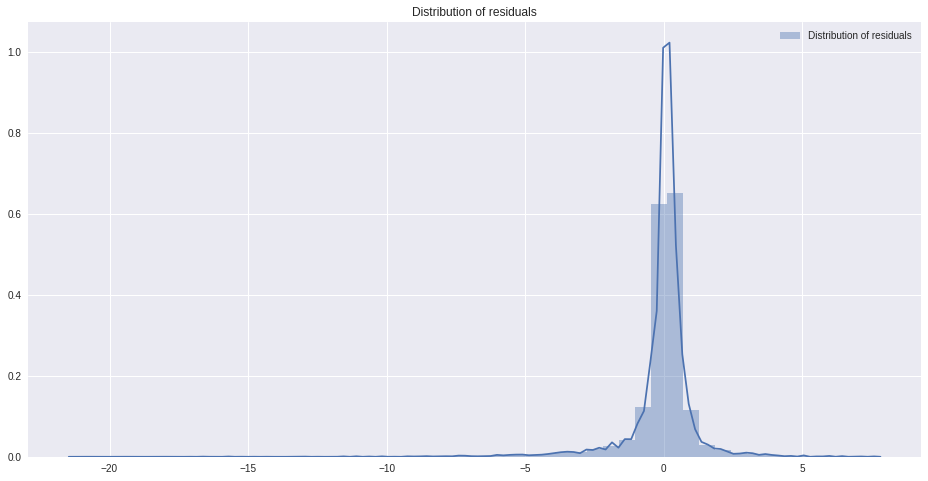

In [ ]:
residuals = y_pred_xgb_unseen[0] - data_unseen['VMOY']

plt.figure(figsize=(16,8))
sns.distplot(residuals, norm_hist=True, label='Distribution of residuals')
plt.title("Distribution of residuals")
plt.legend()
plt.show()

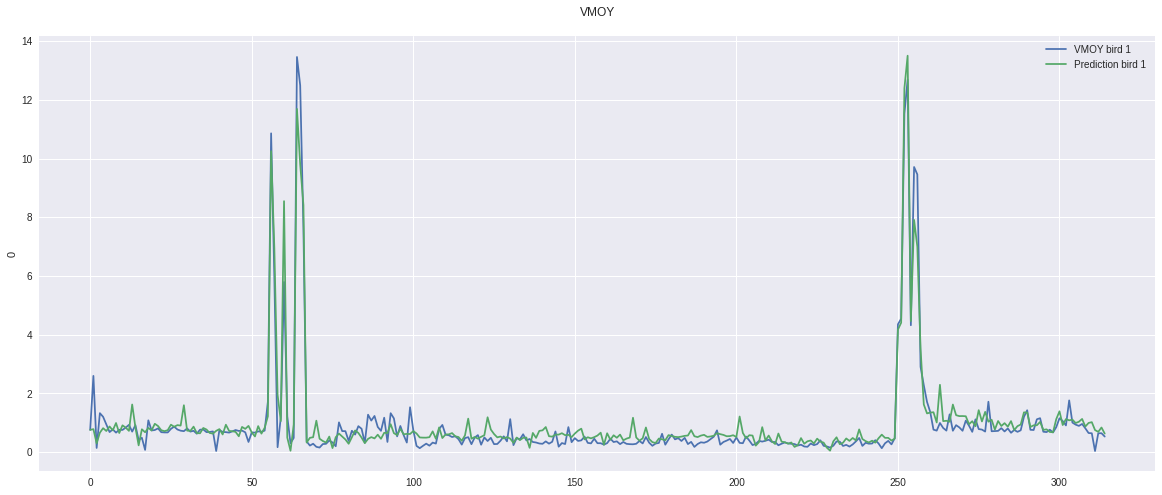

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(df_bird_1.shape[0]), df_bird_1['VMOY'], label='VMOY bird 1', ) # pred_bird_1.shape[0]
sns.lineplot(range(df_bird_1.shape[0]), pred_bird_1_xgb[0], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

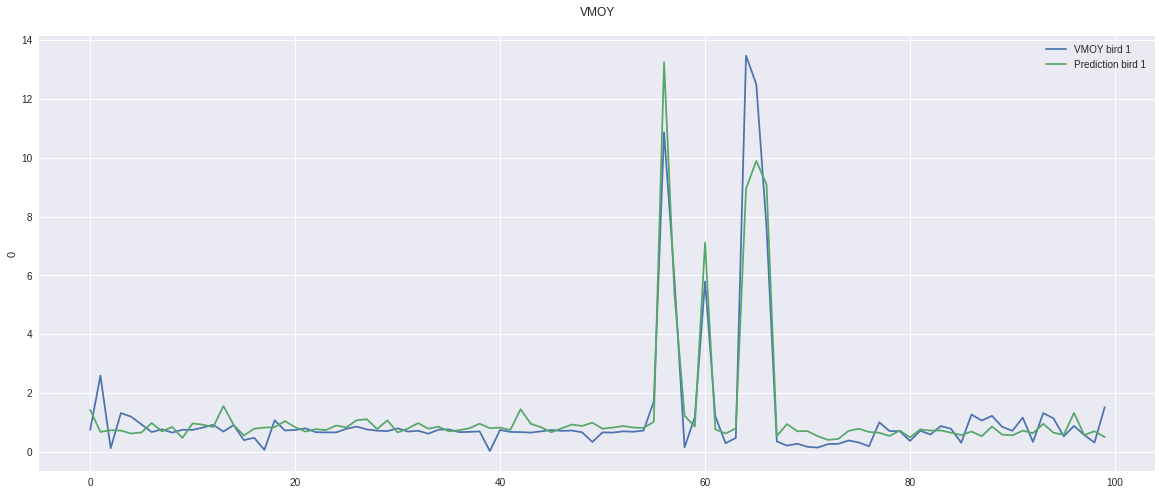

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), df_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1_lgbm[0].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_xgboost_model_20-06.sav'
pickle.dump(xgb_reg, open(filename, 'wb')) 

In [ ]:
import pickle
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

Random Forest and Extra Trees tuning with sklearn

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('VMOY', axis=1), data['VMOY'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 500),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=125, verbose=True)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    print('\n ==== Final Results ==== \n')

    return scores, rfr, best_params


In [ ]:
rfr_model(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

def dtr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=DecisionTreeRegressor(),
        param_grid={
            'max_depth': range(1,15),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    dtr = DecisionTreeRegressor(max_depth=best_params["max_depth"], 
                                min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated',
                                random_state=125, splitter='best')
# Perform K-Fold CV
    scores = cross_val_score(dtr, X, y, cv=10, scoring='neg_mean_absolute_error')

    print('\n ==== Final Results ==== \n')

    return scores, dtr, best_params
# 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True), min_samples_split=best_params["min_samples_split"],

In [ ]:
dtr_model(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1108s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1018s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   18.1s finished



 ==== Final Results ==== 



(array([-0.58464583, -0.5916901 , -0.60070376, -0.5707226 , -0.55040975,
        -0.54754868, -0.59522934, -0.58825957, -0.56504479, -0.58302004]),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=125, splitter='best'),
 {'max_depth': 8})

In [ ]:
dtr = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, presort='deprecated',
                            random_state=125, splitter='best').fit(X_train, y_train)
# Perform K-Fold CV
scores = cross_val_score(dtr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print(scores)

[-0.58464583 -0.5916901  -0.60070376 -0.5707226  -0.55040975 -0.54754868
 -0.59522934 -0.58825957 -0.56504479 -0.58302004]


In [ ]:
dtr.feature_importances_

array([0.16549809, 0.00512495, 0.02568237, 0.00361612, 0.02407759,
       0.00641294, 0.00789017, 0.00601952, 0.02994011, 0.00731844,
       0.00862737, 0.01642134, 0.00285322, 0.00446359, 0.00381407,
       0.00196039, 0.06028051, 0.05606282, 0.06573922, 0.37934587,
       0.1188513 ])

In [ ]:
names = 
names

Index(['month', 'day', 'TMP_surface', 'TMP_700mb', 'UGRD_10maboveground',
       'VGRD_10maboveground', 'UGRD_700mb', 'VGRD_700mb', 'PRES_surface',
       'PRMSL_meansealevel', 'PRATE_surface', 'RH_2maboveground',
       'Norme_Vent_10maboveground', 'Norme_Vent_700mb',
       'Angle_Vent_10maboveground', 'Angle_Vent_700mb', 'angle_oiseau',
       'location-lat-start', 'location-long-start', 'location-lat-end',
       'location-long-end'],
      dtype='object')

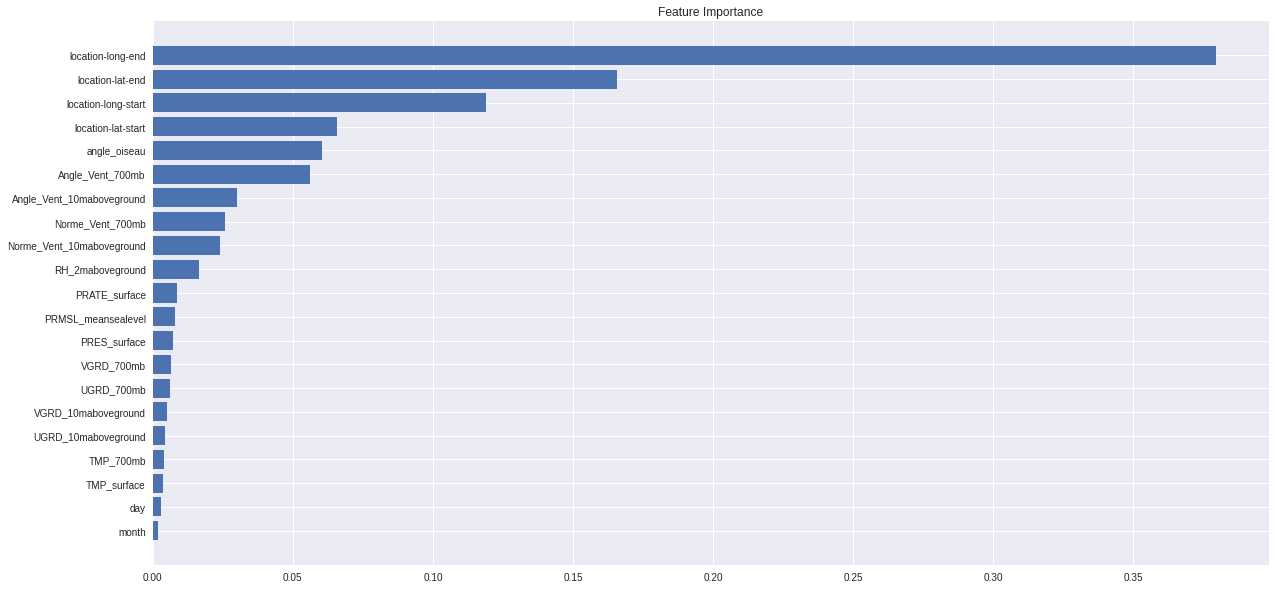

In [ ]:
# Calculate feature importances
importances = dtr.feature_importances_

# Sort feature importances in ascending order
indices = np.argsort(importances)[::]

# Rearrange feature names so they match the sorted feature importances
names = X_train.columns

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names, rotation=0)

# Show plot
plt.show()

In [ ]:
pred_test = dtr.predict(X_test)
pred_test

array([0.91898876, 0.50262437, 0.72557826, ..., 0.72557826, 0.28603681,
       0.72557826])

In [ ]:
pred_test = pd.DataFrame(pred_test)
y_test = pd.DataFrame(y_test)

In [ ]:
pred_test.describe()

0
count  6811.000000
mean      0.861757
std       0.546289
min       0.007989
25%       0.502624
50%       0.725578
75%       1.092608
max       7.089926

In [ ]:
y_test.describe()

VMOY
count  6811.000000
mean      0.878961
std       0.991134
min       0.000002
25%       0.241157
50%       0.568544
75%       1.111897
max       7.671999

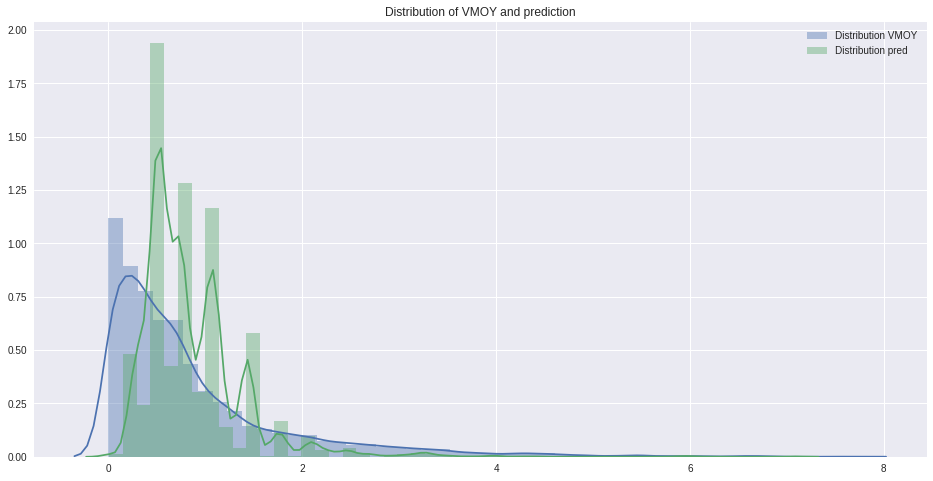

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(y_test, norm_hist=True, label='Distribution VMOY')
sns.distplot(pred_test, norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
pred_bird_1 = pd.DataFrame(dtr.predict(df_bird_1.drop(['VMOY', 'tag-local-identifier', 'year'], axis=1)))
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1.describe()

0
count  315.000000
mean     0.697612
std      0.251901
min      0.286037
25%      0.502624
50%      0.725578
75%      0.749938
max      2.083262

In [ ]:
df_bird_1[['VMOY']].describe()

VMOY
count  315.000000
mean     0.657814
std      0.554262
min      0.038025
25%      0.308398
50%      0.526112
75%      0.764508
max      4.210736

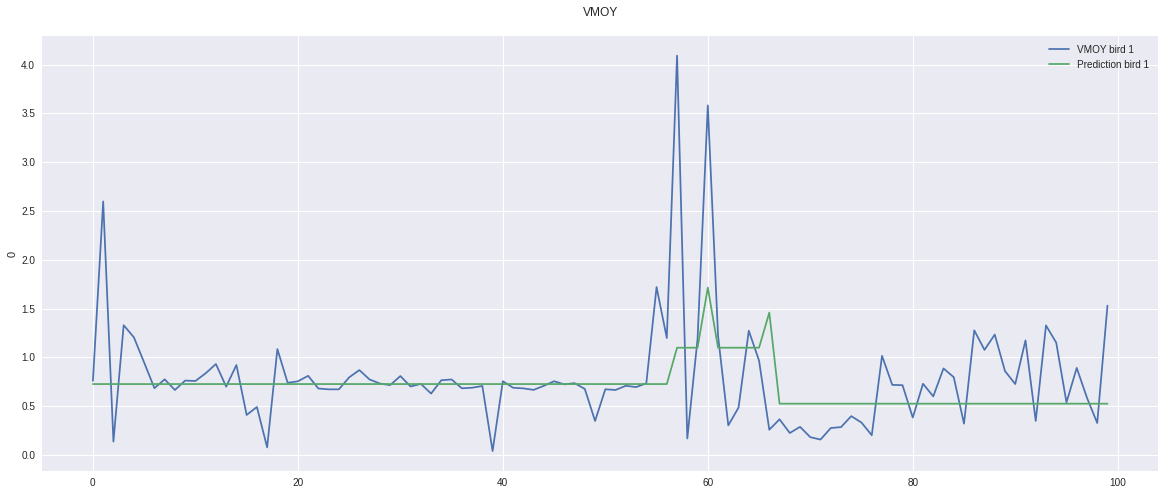

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), df_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1[0].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV

def etr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=ExtraTreesRegressor(),
        param_grid={
            'max_depth': range(5,15),
            'n_estimators': (100, 500, 800),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    etr = ExtraTreesRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=125, verbose=True)
# Perform K-Fold CV
    scores = cross_val_score(etr, X, y, cv=10, scoring='neg_mean_absolute_error')

    print('\n ==== Final Results ==== \n')

    return scores, etr, best_params

In [ ]:
etr_model(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 17


 ==== Final Results ==== 



(array([-0.9050864 , -0.88971628, -0.88231419, -0.89868219, -0.90792914,
        -0.86976219, -0.92378027, -0.97802212, -0.93854044, -0.93549032]),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=14, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=500, n_jobs=None, oob_score=False,
                     random_state=125, verbose=True, warm_start=False),
 {'max_depth': 14, 'n_estimators': 500})

In [ ]:
etr = ExtraTreesRegressor(max_depth=14, n_estimators=500, random_state=125, verbose=True, n_jobs=-1).fit(X_train, y_train)
# Perform K-Fold CV
scores = cross_val_score(etr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print(scores)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      |

[-0.9050864  -0.88971628 -0.88231419 -0.89868219 -0.90792914 -0.86976219
 -0.92378027 -0.97802212 -0.93854044 -0.93549032]


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished


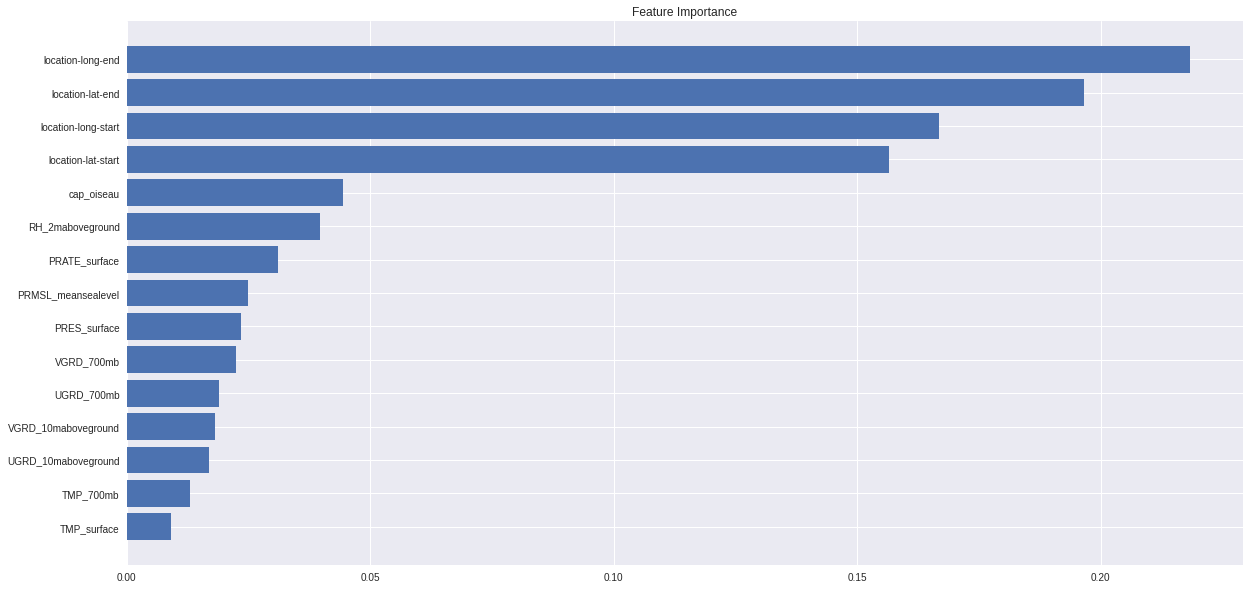

In [ ]:
# Calculate feature importances
importances = etr.feature_importances_

# Sort feature importances in ascending order
indices = np.argsort(importances)[::]

# Rearrange feature names so they match the sorted feature importances
names = X_train.columns

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names, rotation=0)

# Show plot
plt.show()

In [ ]:
pred_test = etr.predict(X_test)
pred_test

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.4s finished


array([0.78725038, 0.80544993, 0.76273602, ..., 0.84730549, 0.92256146,
       0.92233528])

In [ ]:
pred_test = pd.DataFrame(pred_test)
y_test = pd.DataFrame(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("R2: %f" % (r2))

MAE: 0.928998
MSE: 2.743651
R2: 0.671551


In [ ]:
pred_test.describe()

0
count  6697.000000
mean      1.489213
std       1.877304
min       0.090779
25%       0.787256
50%       0.936456
75%       1.268615
max      19.644781

In [ ]:
y_test.describe()

VMOY
count  6697.000000
mean      1.530037
std       2.890435
min       0.000060
25%       0.262329
50%       0.592457
75%       1.216793
max      25.604405

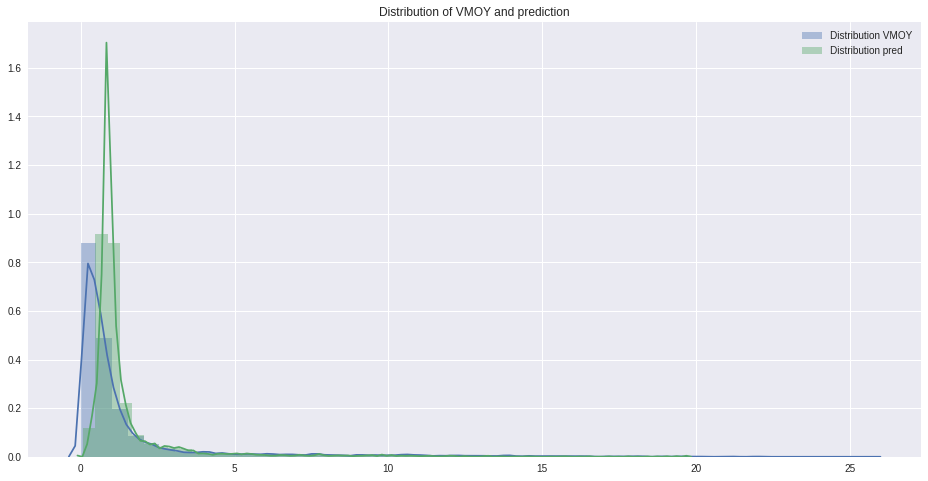

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(y_test, norm_hist=True, label='Distribution VMOY')
sns.distplot(pred_test, norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
pred_bird_1 = pd.DataFrame(etr.predict(df_bird_1.drop(['VMOY', 'tag-local-identifier', 'year', 'month', 'day', 
                                                                 'Norme_Vent_10maboveground',	'Norme_Vent_700mb',	
                                                                 'Angle_Vent_10maboveground', 'Angle_Vent_700mb'], axis=1)))
# pred_bird_2 = predict_model(model, data=df_bird_2)
# pred_bird_3 = predict_model(model, data=df_bird_3)

pred_bird_1.describe()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished


0
count  315.000000
mean     1.057722
std      1.190506
min      0.592119
25%      0.744030
50%      0.763832
75%      1.008060
max     11.454789

In [ ]:
df_bird_1[['VMOY']].describe()

VMOY
count  315.000000
mean     0.922916
std      1.782974
min      0.038025
25%      0.311182
50%      0.529977
75%      0.765926
max     13.460609

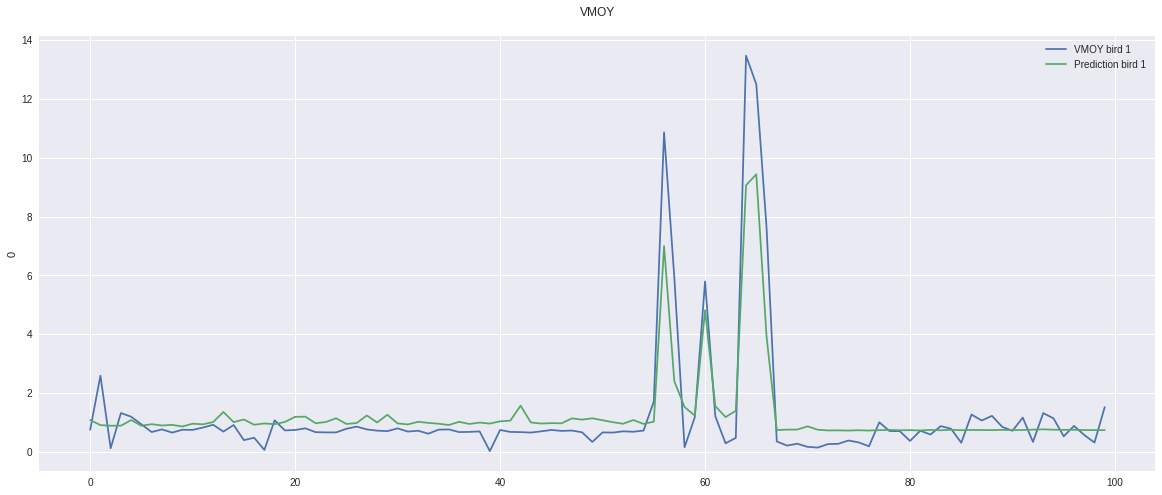

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), df_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1[0].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

## **Finalisation des modèles pour déploiement expérience du 17/06**

Decision Tree du 17/06


In [ ]:
final_decision_tree = finalize_model(decision_tree)
print(final_decision_tree)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=125, splitter='best')


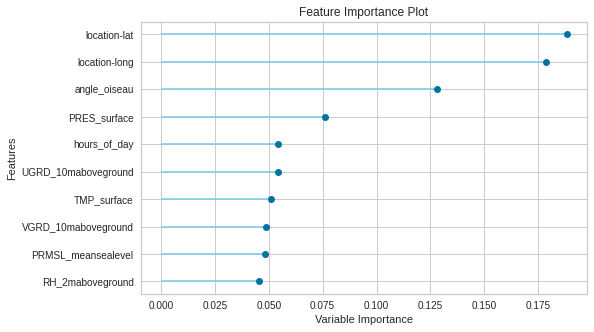

In [ ]:
plot_model(final_decision_tree, plot='feature')

In [ ]:
unseen_predictions = predict_model(final_decision_tree, data=data_unseen)
unseen_predictions[['VMOY', 'Label']].describe()

VMOY          Label
count  228542.000000  228542.000000
mean        0.844150       0.868819
std         2.335072       2.353005
min         0.000001       0.000000
25%         0.007220       0.007600
50%         0.054600       0.059400
75%         0.437541       0.481700
max        19.996763      19.995100

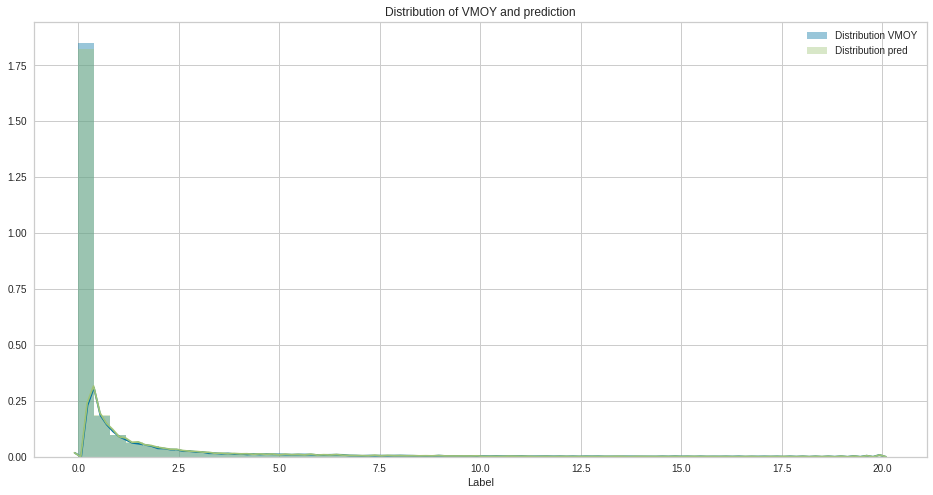

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(unseen_predictions['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(unseen_predictions['Label'], norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

XGBoost du 17/06

In [ ]:
final_xgboost = finalize_model(xgboost)
print(final_xgboost)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=125,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


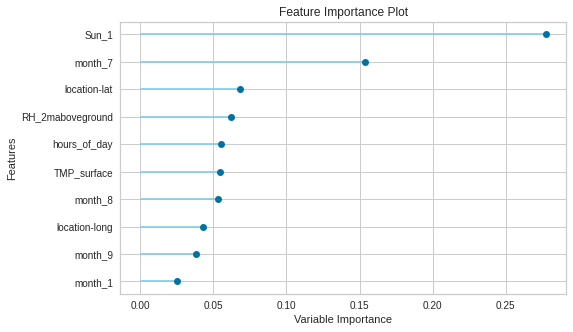

In [ ]:
plot_model(final_xgboost, plot='feature')

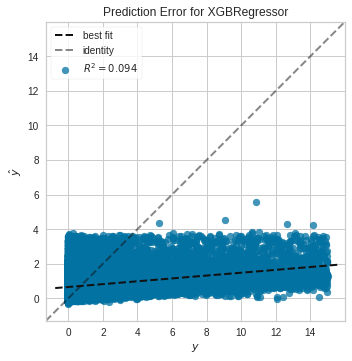

In [ ]:
plot_model(final_xgboost, plot='error')

In [ ]:
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions[['VMOY', 'Label']].describe()

VMOY          Label
count  2.268540e+05  226854.000000
mean   7.254581e-01       0.723876
std    1.863041e+00       0.495632
min    8.233106e-07      -0.296600
25%    7.129970e-03       0.338600
50%    5.337146e-02       0.699150
75%    4.184024e-01       1.048600
max    1.499696e+01       6.565400

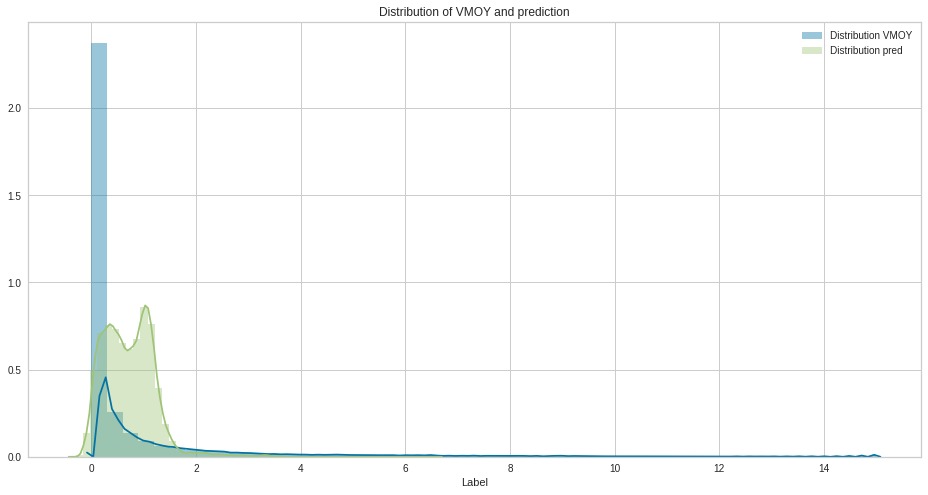

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(unseen_predictions['VMOY'], norm_hist=True, label='Distribution VMOY')
sns.distplot(unseen_predictions['Label'], norm_hist=True, label='Distribution pred')
plt.title("Distribution of VMOY and prediction")
plt.legend()
plt.show()

In [ ]:
pred_bird_1 = predict_model(final_xgboost, data=df_bird_1)
pred_bird_2 = predict_model(final_xgboost, data=df_bird_2)
pred_bird_3 = predict_model(final_xgboost, data=df_bird_3)

pred_bird_1[['VMOY', 'Label']].describe()

VMOY       Label
count  500.000000  500.000000
mean     0.400686    0.280983
std      0.523015    0.168239
min      0.000435   -0.082300
25%      0.022521    0.198500
50%      0.174690    0.272450
75%      0.551735    0.419700
max      3.529512    0.649000

In [ ]:
pred_bird_2[['VMOY', 'Label']].describe()

VMOY       Label
count  500.000000  500.000000
mean     0.996935    0.391404
std      1.500824    0.168483
min      0.000439    0.047000
25%      0.053578    0.313625
50%      0.343155    0.391200
75%      1.385236    0.533475
max     11.554682    0.770500

In [ ]:
pred_bird_3[['VMOY', 'Label']].describe()

VMOY       Label
count  500.000000  500.000000
mean     0.508723    0.326684
std      0.794782    0.183878
min      0.000136   -0.168900
25%      0.007192    0.202625
50%      0.083905    0.335250
75%      0.743636    0.447200
max      4.313950    0.913300

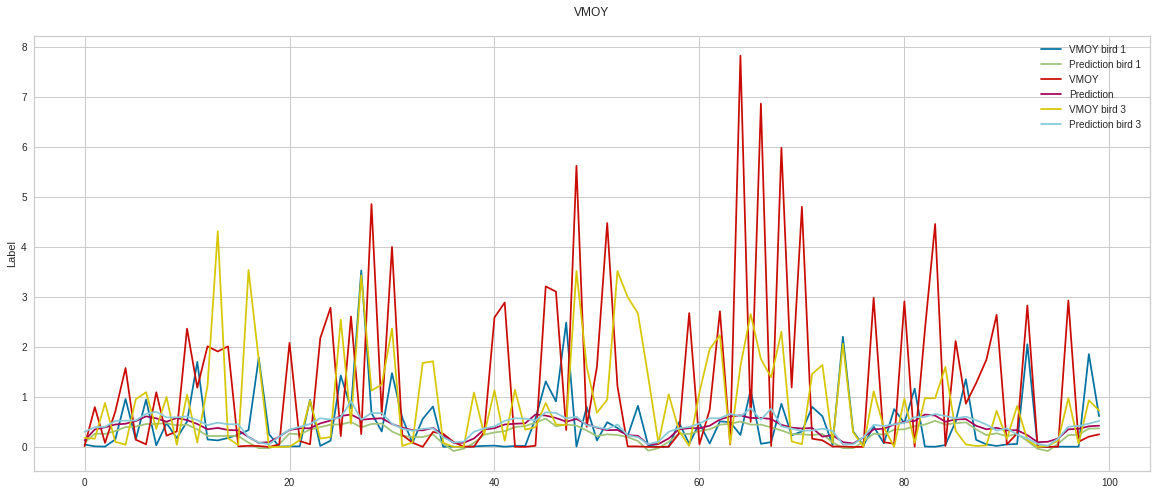

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

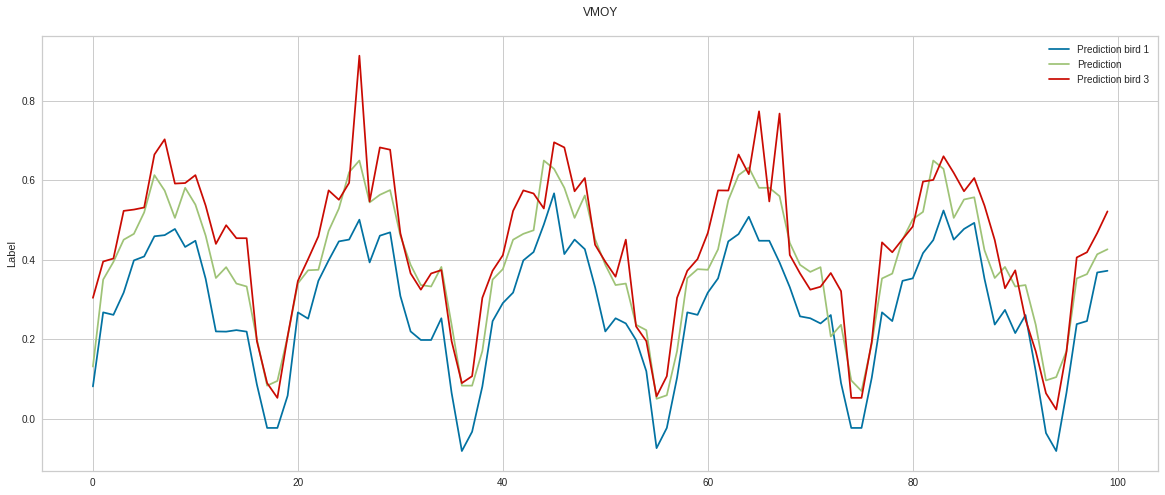

In [ ]:
plt.figure(figsize=(20,8))
# sns.lineplot(range(100), pred_bird_1['VMOY'].iloc[:100], label='VMOY bird 1') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_1['Label'].iloc[:100], label='Prediction bird 1') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_2['VMOY'].iloc[:100], label='VMOY ') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_2['Label'].iloc[:100], label='Prediction') # pred_bird_1.shape[0]
# sns.lineplot(range(100), pred_bird_3['VMOY'].iloc[:100], label='VMOY bird 3') # pred_bird_1.shape[0]
sns.lineplot(range(100), pred_bird_3['Label'].iloc[:100], label='Prediction bird 3') # pred_bird_1.shape[0]
plt.title("VMOY\n")
plt.show()

## **Finalisation des modèles pour déploiement expérience du 16/06**

In [ ]:
final_decision_tree_boost = finalize_model(decision_tree_boost)
print(final_decision_tree_boost)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=125,
                                                       splitter='best'),
                

In [ ]:
final_xgboost = finalize_model(xgboost)
print(final_xgboost)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=125,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [ ]:
predict_model(final_xgboost)

Model     MAE  ...   RMSLE      MAPE
0  Extreme Gradient Boosting Regressor  1.0673  ...  0.5945  282.8151

[1 rows x 7 columns]

location-lat  location-long  TMP_surface  ...  Sun_1      VMOY   Label
0          43.689025       4.694798   295.399994  ...    1.0  0.208092  0.7248
1          43.669678       4.518978   284.799988  ...    0.0  1.133786  0.3881
2          37.167710      -5.961421   308.581635  ...    1.0  1.095625  1.3621
3          37.814786      -4.748819   287.161102  ...    1.0  2.563195  0.9398
4          47.861926       9.375251   289.413879  ...    0.0  0.000763  0.1542
...              ...            ...          ...  ...    ...       ...     ...
140369     50.732680       8.812117   311.899994  ...    1.0  1.314894  0.7580
140370     49.590108       8.610068   320.399994  ...    1.0  0.463495  1.0846
140371     49.192596       8.249910   297.143738  ...    1.0  0.000674 -0.1159
140372     34.282850      -6.572937   294.283386  ...    1.0  0.063465  0.9614
140373     36.230303      -5.854230   304.492523  ...    0.0  0.002550  0.1308

[140374 rows x 29 columns]

Gradient boosting regressor

In [ ]:
final_grad_boost_reg = finalize_model(grad_boost_reg)
print(final_grad_boost_reg)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=125, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
predict_model(final_grad_boost_reg)

Model     MAE     MSE  ...      R2   RMSLE      MAPE
0  Gradient Boosting Regressor  1.0659  4.5809  ...  0.1097  0.5939  284.6807

[1 rows x 7 columns]

location-lat  location-long  TMP_surface  ...  Sun_1      VMOY   Label
0          43.689025       4.694798   295.399994  ...    1.0  0.208092  0.6820
1          43.669678       4.518978   284.799988  ...    0.0  1.133786  0.3861
2          37.167710      -5.961421   308.581635  ...    1.0  1.095625  1.3400
3          37.814786      -4.748819   287.161102  ...    1.0  2.563195  0.9680
4          47.861926       9.375251   289.413879  ...    0.0  0.000763  0.1433
...              ...            ...          ...  ...    ...       ...     ...
140369     50.732680       8.812117   311.899994  ...    1.0  1.314894  0.7420
140370     49.590108       8.610068   320.399994  ...    1.0  0.463495  1.0934
140371     49.192596       8.249910   297.143738  ...    1.0  0.000674 -0.1017
140372     34.282850      -6.572937   294.283386  ...    1.0  0.063465  0.9383
140373     36.230303      -5.854230   304.492523  ...    0.0  0.002550  0.1132

[140374 rows x 29 columns]

## **Sauvegarde du modèle**

In [ ]:
save_model(final_xgboost,'/content/drive/My Drive/Modèles sauvegardés/Final XGBoost Model 17Juin2020')

Transformation Pipeline and Model Succesfully Saved


## **Chargement d'un modèle**

In [ ]:
saved_final_lgbm = load_model('/content/drive/My Drive/Modèles sauvegardés/Final Lightgbm Model 14Juin2020')